In [1]:
import os
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from mne import Epochs, create_info
from mne.io import RawArray
from mne.time_frequency import  tfr_array_morlet
import pandas as pd
import numpy as np
import mne
import scipy.io as sio
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from mne.report import Report
import sys
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs, corrmap, read_ica
from mne.report import Report
import math 
import pickle
import mne
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs, corrmap
from mne.preprocessing import annotate_movement, compute_average_dev_head_t
from mne.report import Report
import math 
import pickle
from mne.time_frequency import tfr_array_multitaper, tfr_array_morlet, tfr_multitaper

In [3]:
import mne
from mne.channels import make_1020_channel_selections
from mne.event import define_target_events

print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
path="F:/epochs_ITC"

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

for subj in subjects:
    epochs = mne.read_epochs(
        f"F:/epochs_ITC/{subj}-raw-ica-reject-ERP-epo.fif",
        preload=True
    )

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    100

In [26]:
for i, ch in enumerate(epochs.ch_names):
    print(f'"EEG {i:03d}": "{ch}",')

"EEG 000": "Fp1",
"EEG 001": "AF7",
"EEG 002": "AF3",
"EEG 003": "F1",
"EEG 004": "F3",
"EEG 005": "F5",
"EEG 006": "F7",
"EEG 007": "FT7",
"EEG 008": "FC5",
"EEG 009": "FC3",
"EEG 010": "FC1",
"EEG 011": "C1",
"EEG 012": "C3",
"EEG 013": "C5",
"EEG 014": "T7",
"EEG 015": "TP7",
"EEG 016": "CP5",
"EEG 017": "CP3",
"EEG 018": "CP1",
"EEG 019": "P1",
"EEG 020": "P3",
"EEG 021": "P5",
"EEG 022": "P7",
"EEG 023": "P9",
"EEG 024": "PO7",
"EEG 025": "PO3",
"EEG 026": "O1",
"EEG 027": "Iz",
"EEG 028": "Oz",
"EEG 029": "POz",
"EEG 030": "Pz",
"EEG 031": "CPz",
"EEG 032": "Fpz",
"EEG 033": "Fp2",
"EEG 034": "AF8",
"EEG 035": "AF4",
"EEG 036": "AFz",
"EEG 037": "Fz",
"EEG 038": "F2",
"EEG 039": "F4",
"EEG 040": "F6",
"EEG 041": "F8",
"EEG 042": "FT8",
"EEG 043": "FC6",
"EEG 044": "FC4",
"EEG 045": "FC2",
"EEG 046": "FCz",
"EEG 047": "Cz",
"EEG 048": "C2",
"EEG 049": "C4",
"EEG 050": "C6",
"EEG 051": "T8",
"EEG 052": "TP8",
"EEG 053": "CP6",
"EEG 054": "CP4",
"EEG 055": "CP2",
"EEG 056": "P2",
"E

In [27]:
print(epochs.ch_names[:20])

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1']


# General and initial exploration

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
    Rejecting  epoch based on EEG : ['Iz']
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of 

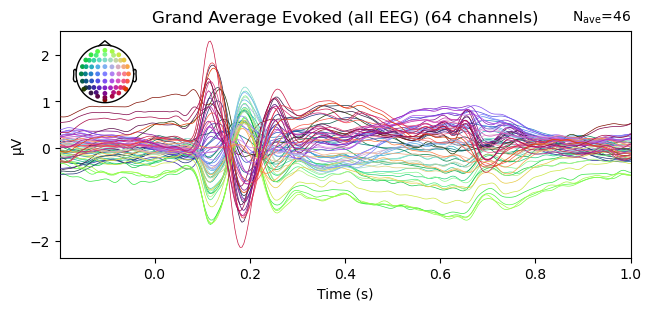

In [32]:
#Evoked Potential
evokeds = []

for subj in subjects:
    epochs = mne.read_epochs(
        f"F:/epochs_ITC/{subj}-raw-ica-reject-ERP-epo.fif",
        preload=False
    )
    evokeds.append(epochs.average())

grand_evoked = mne.grand_average(evokeds)

grand_evoked.plot(
    titles="Grand Average Evoked (all EEG)",
    time_unit="s"
)

In [82]:
# Global Theta Power
freqs = np.arange(2, 30, 1)
n_cycles = freqs / 3

power = epochs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    tmin=epochs.tmin,
    tmax=1.0,
    average=True,
    return_itc=False,
    decim=1,
)

power=power.apply_baseline(baseline=(-0.2,0),mode="logratio")

theta = power.copy().crop(fmin=4, fmax=7)

theta_global = theta.data.mean(axis=(0, 1))

plt.figure()
plt.plot(theta.times, theta_global)
plt.axvline(0, linestyle="--")
plt.title("Global theta power (avg all channels, 3–7 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Power (logratio vs baseline)")
plt.show()

Applying baseline correction (mode: logratio)


In [48]:
#接上，64-channel heat map
import numpy as np
import matplotlib.pyplot as plt
import os

freqs = np.arange(2, 30, 1)
n_cycles = freqs / 3
tmin,tmax=-0.2,1.0
baseline=(-0.2,0)

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

EPOCHS_DIR = r"F:/epochs_ITC"

conds = ["cue/ext/rep/sat","cue/ext/swi/sat","cue/int/rep/sat","cue/int/swi/sat"]

bands = {"theta": (4, 7),"alpha": (8, 12)}
    
# storage: band_ct[band][cond] -> list of (n_channels, n_times) per subject
band_ct = {band: {cond: [] for cond in conds} for band in bands}

valid_subjects = []
times = None
ch_names = None

#Main Loop
for subj in subjects:
    epo_path=os.path.join(EPOCHS_DIR,f"{subj}-raw-ica-reject-ERP-epo.fif")
    epochs = mne.read_epochs(epo_path, preload=True)
    epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)

for cond in conds:
    epochs_cell = epochs[cond].copy()
    epo_path=os.path.join(EPOCHS_DIR,f"{subj}-raw-ica-reject-ERP_epo.fif")

    power = epochs_cell.compute_tfr(
        method="morlet",
        freqs=freqs,
        n_cycles=n_cycles,
        tmin=-0.2,
        tmax=1.0,
        average=True,
        return_itc=False,
        decim=3,
    )
    power.apply_baseline(baseline=(-0.2, 0), mode="logratio")

    for band_name, (fmin, fmax) in bands.items():
        p_band = power.copy().crop(fmin=fmin, fmax=fmax)
        band_ct[band_name][cond] = p_band.data.mean(axis=1)


times = power.times
ch_names = power.ch_names
yticks = np.arange(0, len(ch_names), 2)

#Theta
theta_ct = band_ct["theta"]
all_vals = np.concatenate([theta_ct[c].ravel() for c in conds])
vmax = np.percentile(np.abs(all_vals), 98)
vmin = -vmax

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True, constrained_layout=True)

for ax, cond in zip(axes.ravel(), conds):
    im = ax.imshow(
        theta_ct[cond],
        aspect="auto",
        origin="lower",
        extent=[times[0], times[-1], 0, len(ch_names)],
        vmin=vmin,
        vmax=vmax,
    )
    ax.axvline(0, linestyle="--")
    ax.set_title(cond.replace("cue/", ""))
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Channel")

axes[0, 0].set_yticks(yticks)
axes[0, 0].set_yticklabels([ch_names[i] for i in yticks], fontsize=7)

fig.colorbar(im, ax=axes.ravel().tolist(), label="Theta power (logratio)")
plt.show()

# theta difference
diff_ext = theta_ct["cue/ext/rep/sat"] - theta_ct["cue/ext/swi/sat"]
diff_int = theta_ct["cue/int/rep/sat"] - theta_ct["cue/int/swi/sat"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True, constrained_layout=True)

for ax, diff, title in zip(
    axes,
    [diff_ext, diff_int],
    ["ext: rep − swi (theta)", "int: rep − swi (theta)"]
):
    im = ax.imshow(
        diff,
        aspect="auto",
        origin="lower",
        extent=[times[0], times[-1], 0, len(ch_names)],
        vmin=vmin,
        vmax=vmax,
        cmap="RdBu_r",
    )
    ax.axvline(0, linestyle="--", color="k")
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Channel")

axes[0].set_yticks(yticks)
axes[0].set_yticklabels([ch_names[i] for i in yticks], fontsize=7)

fig.colorbar(im, ax=axes.ravel().tolist(), label="Theta power difference (logratio)")
plt.show()

#alpha difference
alpha_ct = band_ct["alpha"]

diff_ext_alpha = (alpha_ct["cue/ext/rep/sat"] -alpha_ct["cue/ext/swi/sat"])
diff_int_alpha = (alpha_ct["cue/int/rep/sat"] -alpha_ct["cue/int/swi/sat"])

all_diff_vals_alpha = np.concatenate([diff_ext_alpha.ravel(),diff_int_alpha.ravel()])
vmax_diff_alpha = np.percentile(np.abs(all_diff_vals_alpha), 98)
vmin_diff_alpha = -vmax_diff_alpha

fig, axes = plt.subplots(
    1, 2, figsize=(14, 6),
    sharex=True, sharey=True,
    constrained_layout=True
)

for ax, diff, title in zip(
    axes,
    [diff_ext_alpha, diff_int_alpha],
    ["ext: rep − swi (alpha)", "int: rep − swi (alpha)"]
):
    im = ax.imshow(
        diff,
        aspect="auto",
        origin="lower",
        extent=[times[0], times[-1], 0, len(ch_names)],
        vmin=vmin_diff_alpha,
        vmax=vmax_diff_alpha,
        cmap="RdBu_r",
    )
    ax.axvline(0, linestyle="--", color="k")
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Channel")

axes[0].set_yticks(yticks)
axes[0].set_yticklabels([ch_names[i] for i in yticks], fontsize=7)

fig.colorbar(
    im,
    ax=axes.ravel().tolist(),
    label="Alpha power difference (logratio)"
)
plt.show()

# alpha
alpha_ct = band_ct["alpha"]
all_vals_alpha = np.concatenate([alpha_ct[c].ravel() for c in conds])
vmax_alpha = np.percentile(np.abs(all_vals_alpha), 98)
vmin_alpha = -vmax_alpha

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True, constrained_layout=True)

for ax, cond in zip(axes.ravel(), conds):
    im = ax.imshow(
        alpha_ct[cond],
        aspect="auto",
        origin="lower",
        extent=[times[0], times[-1], 0, len(ch_names)],
        vmin=vmin_alpha,
        vmax=vmax_alpha,
    )
    ax.axvline(0, linestyle="--")
    ax.set_title(cond.replace("cue/", ""))
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Channel")

axes[0, 0].set_yticks(yticks)
axes[0, 0].set_yticklabels([ch_names[i] for i in yticks], fontsize=7)

fig.colorbar(im, ax=axes.ravel().tolist(), label="Alpha power (logratio)")
plt.show()

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_18-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_22-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
805 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_26-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_34-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_38-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_42-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
920 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_46-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_04-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
940 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_12-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_16-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1027 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_24-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_32-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_36-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_40-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_01-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_05-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_21-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_25-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_29-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
575 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
990 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_35-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_37-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_41-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_45-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_03-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1016 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_11-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_15-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
972 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_19-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
997 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_39-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_43-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3055490286.py:33: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick_types(eeg=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


In [3]:
#Frequency analysis
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.datasets import somato

import os
import numpy as np
import mne

In [50]:
subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

EPOCHS_DIR = r"F:/epochs_ITC"

target_sfreq = 100  #200对应最高分析100Hz，100对应一秒100个时间点，最高分析到50Hz
tmin, tmax = -0.2,1.0         
baseline = (-0.2, 0.0)           

pick_kwargs = dict(eeg=True, eog=False, meg=False, stim=False)

epochs_all = {}

for subj in subjects:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
    epochs = mne.read_epochs(epo_path, preload=True)

  
    if target_sfreq is not None and epochs.info["sfreq"] != target_sfreq:
        epochs = epochs.copy().resample(target_sfreq)

    epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
    epochs = epochs.copy().apply_baseline(baseline)
    epochs = epochs.copy().pick_types(**pick_kwargs)
    epochs_all[subj] = epochs

print(f"Loaded {len(epochs_all)} subjects' epochs.")


Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_18-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_22-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
805 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_26-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


        0 CTF compensation matrices available
Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_1_34-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_38-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_42-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
920 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_1_46-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_04-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Not setting metadata
940 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_12-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_16-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1027 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_24-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_32-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_36-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_m_2_40-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_01-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_05-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_21-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_25-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_29-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
575 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Not setting metadata
990 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_1_35-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_37-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_41-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_1_45-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_03-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1016 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_11-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_15-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
972 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_19-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
997 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_39-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Reading F:\epochs_ITC\sub_p_2_43-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated
reject_tmax is not in epochs time interval. Setting reject_tmax to epochs.tmax (0.99078125 s)
Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\1814991018.py:24: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.epochs.EpochsFIF'>.tmax (0.990781 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Loaded 46 subjects' epochs.


In [52]:
#PSD in general
psd = epochs.compute_psd(fmin=2.0, fmax=40.0)
psd.plot(average=True, amplitude=False)
psd.get_data().shape

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


(1019, 64, 46)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...


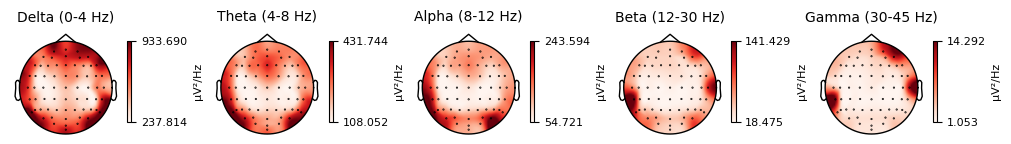

In [53]:
epochs.compute_psd().plot_topomap(ch_type="eeg", normalize=False, contours=0)

In [54]:
#PSD Power spectual density
_, ax = plt.subplots()

spectrum = epochs.compute_psd(
    fmin=2.0,
    fmax=40.0,
    tmax=3.0,
    n_jobs=None,
    picks="eeg",          
)

mean_spectrum = spectrum.average()  # average across epochs
psds, freqs = mean_spectrum.get_data(return_freqs=True)  # psds: (n_channels, n_freqs)

psds_db = 10 * np.log10(psds)
psds_mean = psds_db.mean(axis=0)    # mean across channels
psds_std  = psds_db.std(axis=0)     # std across channels

ax.plot(freqs, psds_mean, color="k")
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color="k", alpha=0.5, edgecolor="none")

ax.set(
    title="Multitaper PSD (EEG, mean ± SD across channels)",
    xlabel="Frequency (Hz)",
    ylabel="Power Spectral Density (dB)",
)
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 1.200 (s)
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


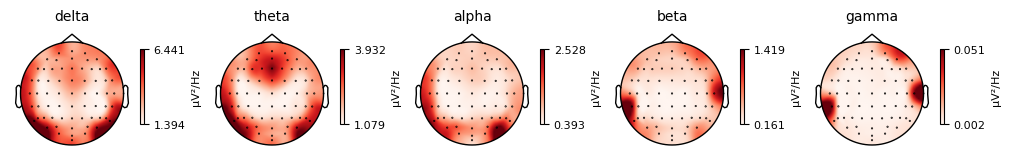

In [55]:
#visualizing Specturum Objects
%matplotlib qt

epochs_eeg = epochs.copy().pick_types(eeg=True, eog=False, meg=False)
epochs_spectrum = epochs_eeg.compute_psd(
    method="welch",       
    fmin=2, fmax=40,
    picks="eeg",
    n_jobs=None
)
evk_spectrum = epochs_spectrum.average()
evk_spectrum.plot(picks="data", exclude="bads")
evk_spectrum.plot(dB=True) 
evk_spectrum.plot_topo(color="k", fig_facecolor="w", axis_facecolor="w",show=True)
evk_spectrum.plot_topomap(ch_type="eeg", agg_fun=np.median,show=True)

bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta": (12, 30),
    "gamma": (30, 40),
}

evk_spectrum.plot_topomap(
    bands=bands,
    ch_type="eeg",
    agg_fun=np.median,   
    normalize=False,
    contours=0,
    show=True
)    

In [59]:
#visualizing Specturum Objects- 4 conditions seperately

conds = ["cue/sat/int/rep","cue/sat/int/swi","cue/sat/ext/rep","cue/sat/ext/swi"]

for cond in conds:
    ep = epochs.copy().pick_types(eeg=True, eog=False, meg=False)[cond]

    psd = ep.compute_psd(method="welch", fmin=2, fmax=40, picks="eeg")
    spec = psd.average()  
    
    fig = spec.plot(dB=True, show=True)
    fig.suptitle(f"EEG – {cond}", fontsize=14)
    fig.savefig(f"psd_{cond.replace('/','_')}.png", dpi=300, bbox_inches="tight")

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 1.200 (s)
Plotting power spectral density (dB=True).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 1.200 (s)
Plotting power spectral density (dB=True).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 1.200 (s)
Plotting power spectral density (dB=True).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 1.200 (s)
Plotting power spectral density (dB=True).


# By using average power to first explore the power and ITC

In [ ]:
# Power changes Across time - Under 4 conditions

conds = ["cue/sat/int/rep","cue/sat/int/swi","cue/sat/ext/rep","cue/sat/ext/swi"]

freqs=np.arange()
power_by_cond = {}
itc_by_cond = {}

epochs_eeg = epochs.copy().pick_types(eeg=True, eog=False, meg=False)

for cond in conds:
    ep = epochs_eeg[cond]
    power, itc = ep.compute_tfr(
        method="morlet",
        freqs=freqs,
        n_cycles=n_cycles,
        picks="eeg",
        average=True,     
        return_itc=True,
        decim=3,
    )

    power_by_cond[cond] = power
    itc_by_cond[cond] = itc

In [ ]:
#Original code without seperating into 4 conditions
power.plot_joint(
    baseline=(-0.2, 0), mode="logratio", tmin=-0.2, tmax=1, timefreqs=[(0, 4),(0.2, 4), (0.4, 4),(0.6, 4),(0.8, 4)]
)
power.plot_joint(
    baseline=(-0.2, 0), mode="logratio", tmin=-0.2, tmax=1, timefreqs=[(0, 8),(0.2, 8), (0.4, 8),(0.6, 8),(0.8,8)]
)

In [ ]:
#Power plot under 4 conditions

timefreqs_4 = [(0.0, 4), (0.2, 4), (0.4, 4), (0.6, 4), (0.8, 4)]
timefreqs_8 = [(0.0, 8), (0.2, 8), (0.4, 8), (0.6, 8), (0.8, 8)]

conds = ["cue/sat/int/rep","cue/sat/int/swi","cue/sat/ext/rep","cue/sat/ext/swi"]

for cond in conds:
    pw = power_by_cond[cond]

    figs_4 = pw.plot_joint(
        baseline=(-0.2, 0),
        mode="logratio",
        tmin=-0.2, tmax=1.0,
        timefreqs=timefreqs_4,
        show=True
    )
    
    if not isinstance(figs_4, (list, tuple)):
        figs_4 = [figs_4]
    for k, fig in enumerate(figs_4):
        fig.suptitle(f"EEG – {cond} | joint @4Hz", fontsize=14)
        fig.savefig(f"ThetaPower_{cond.replace('/','_')}.png", dpi=300, bbox_inches="tight")
        
    figs_8 = pw.plot_joint(
        baseline=(-0.2, 0),
        mode="logratio",
        tmin=-0.2, tmax=1.0,
        timefreqs=timefreqs_8,
        show=True
    )
    if not isinstance(figs_8, (list, tuple)):
        figs_8 = [figs_8]
    for k, fig in enumerate(figs_8):
        fig.suptitle(f"EEG – {cond} | joint @8Hz", fontsize=14)
        fig.savefig(f"AlphaPower_{cond.replace('/','_')}.png", dpi=300, bbox_inches="tight")

In [ ]:
#ITC
itc.plot_topo(title="Inter-Trial coherence", vmin=0.0, vmax=1.0, cmap="Reds")

In [ ]:
# ITC under 4 conditions

conds = ["cue/sat/int/rep", "cue/sat/int/swi", "cue/sat/ext/rep", "cue/sat/ext/swi"]


for cond in conds:
    itc = itc_by_cond[cond]

    fig = itc.plot_topo(title=f"Inter-Trial Coherence (ITC) – {cond}",vmin=0.0, vmax=1.0,cmap="Reds")
    fig.savefig(f"ITC_topo_{cond.replace('/','_')}.png",dpi=300,bbox_inches="tight")

In [ ]:
# Time-frequency of power under ROI channels
frontal_chs=["Fz", "F1", "F2", "FCz", "FC1", "FC2", "Cz"]
occipital_chs = ["Oz", "O1", "O2","POz", "PO3", "PO4"]

bands={"theta":(4,8),"alpha":(8,12)}

import numpy as np
import mne

def extract_roi_band_timecourse(power, roi_channels, fmin, fmax):
    missing = [ch for ch in roi_channels if ch not in power.ch_names]
    if len(missing) > 0:
        raise ValueError(f"Missing channels in {roi_name}: {missing}")

    roi_idx = [power.ch_names.index(ch) for ch in roi_channels]
    freq_mask = (power.freqs >= fmin) & (power.freqs <= fmax)
    roi_data = power.data[roi_idx][:, freq_mask, :] #channel x freqs x times
    roi_tc = roi_data.mean(axis=(0, 1))

    return roi_tc
    
frontal_theta = extract_roi_band_timecourse(power,frontal_chs,*bands["theta"])
frontal_alpha = extract_roi_band_timecourse(power,frontal_chs,*bands["alpha"])
occipital_theta=extract_roi_band_timecourse(power,occipital_chs,*bands["theta"])
occipital_alpha=extract_roi_band_timecourse(power,occipital_chs,*bands["alpha"])

times = power.times

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(times, frontal_theta, label="Frontal Theta")
plt.plot(times, frontal_alpha, label="Frontal Alpha")
plt.plot(times, occipital_theta, label="Occipital Theta")
plt.plot(times, occipital_alpha, label="Occipital Alpha")
plt.axvline(0, color="k", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Power")
plt.legend()
plt.title("ROI × Band Time Courses")
plt.tight_layout()
plt.show()


# Cluster permutation with ROI, to invetigate the time x frequency. Data is TFR (Cycle = 3) 

In [42]:
#Compute TFR
import numpy as np
import mne
import os

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

EPOCHS_DIR = r"F:/epochs_ITC"
OUT_DIR = r"F:/tfr_single_trial"

freqs = np.arange(2, 30, 1)
n_cycles = freqs / 3
tmin,tmax=(-0.2,1)

out_data = os.path.join(OUT_DIR, f"{subj}_power.npy")
out_meta = os.path.join(OUT_DIR, f"{subj}_meta.npz")

epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)
print("[epochs] len:", len(epochs))

for subj in subjects:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)
    
    power = epochs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    tmin=epochs.tmin,
    tmax=1.0,
    average=False,
    return_itc=False,
    decim=1)
    power=power.apply_baseline(baseline=(-0.2,0),mode="logratio")
    print("[tfr] type:", type(power))
    print("[tfr] shape:", power.data.shape)  # (n_trials, n_ch, n_freq, n_time) expected
    assert power.data.ndim == 4
    assert power.data.shape[0] == len(epochs)

    out_data = os.path.join(OUT_DIR, f"{subj}_power.npy")
    out_meta = os.path.join(OUT_DIR, f"{subj}_meta.npz")

    np.save(out_data, power.data.astype(np.float32))
    np.savez(
        out_meta,
        ch_names=np.array(power.ch_names, dtype=object),
        freqs=power.freqs.astype(np.float32),
        times=power.times.astype(np.float32),
    )


Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 778
Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:21: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (778, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1046, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (896, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1030, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_18-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1009, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_22-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
805 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (805, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_26-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (674, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (854, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_34-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1013, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_38-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1004, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_42-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
920 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (920, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_46-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (967, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_04-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (822, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
940 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (940, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_12-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (839, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_16-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1040, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1027 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1027, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_24-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (817, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (970, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_32-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (849, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_36-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1007, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_40-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (880, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1015, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_01-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1013, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_05-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (983, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (714, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (603, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (909, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_21-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1012, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_25-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (941, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_29-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
575 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (575, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
990 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (990, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_35-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (908, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_37-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (981, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_41-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (991, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_45-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (947, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_03-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1016 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1016, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (970, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_11-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1004, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_15-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
972 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (972, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_19-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
997 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (997, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (834, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (913, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_39-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1005, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_43-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1020, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\3150188834.py:26: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1019, 64, 28, 308)


In [20]:
#import matplotlib
import os
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

In [49]:
#Power changes across time under 4 conditions,selected ROI
%matplotlib qt
import matplotlib.pyplot as plt
import numpy as np

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

OUT_DIR = r"F:/tfr_single_trial"
EPOCHS_DIR = r"F:/epochs_ITC"

conds = ["cue/sat/int/rep","cue/sat/int/swi","cue/sat/ext/rep","cue/sat/ext/swi"]
roi = ["Fz", "F1", "F2", "FCz", "FC1", "FC2", "Cz"]

group_tf = {cond: [] for cond in conds}

freqs_ref = None
times_ref = None

for subj in subjects:
    power_path = os.path.join(OUT_DIR, f"{subj}_power.npy")
    meta_path  = os.path.join(OUT_DIR, f"{subj}_meta.npz")
    epo_path   = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")

    X = np.load(power_path, mmap_mode="r")  # (n_trials, n_ch, n_freq, n_time)
    meta = np.load(meta_path, allow_pickle=True)
    ch_names = meta["ch_names"].tolist()
    freqs = meta["freqs"]
    times = meta["times"]

    if freqs_ref is None:
        freqs_ref = freqs.copy()
        times_ref = times.copy()
    else:
        if (len(freqs) != len(freqs_ref) or len(times) != len(times_ref)
            or not np.allclose(freqs, freqs_ref) or not np.allclose(times, times_ref)):
            print("SKIP axis mismatch:", subj)
            continue
    try:
        roi_idx = [ch_names.index(ch) for ch in roi]
    except ValueError:
        print("SKIP missing ROI chan:", subj)
        continue
    # epochs only for selected condition (must match trial count)
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=times[0], tmax=times[-1])

    for cond in conds:
        cond_sel = epochs[cond].selection
        idx = np.flatnonzero(np.isin(epochs.selection, cond_sel))
        if len(idx) == 0:
            continue

        tf = X[idx][:, roi_idx].mean(axis=(0, 1))
        group_tf[cond].append(tf.astype(np.float32))

group_mean = {}
for cond in conds:
    if len(group_tf[cond]) == 0:
        group_mean[cond] = None
        print("No subjects for cond:", cond)
    else:
        group_mean[cond] = np.mean(np.stack(group_tf[cond], axis=0), axis=0)

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    100

In [51]:
#plot above
available = [group_mean[c] for c in conds if group_mean[c] is not None]
stack = np.stack(available, axis=0)
vmin, vmax = np.percentile(stack, [5, 95])

fig, axes = plt.subplots(2, 2, figsize=(12, 8),
                        gridspec_kw={"width_ratios": [1, 1], "wspace": 0.25, "hspace": 0.25})
axes = axes.flatten()

for ax, cond in zip(axes, conds):
    tf = group_mean[cond]
    im = ax.imshow(
        tf,
        aspect="auto",
        origin="lower",
        extent=[times_ref[0], times_ref[-1], freqs_ref[0], freqs_ref[-1]],
        vmin=vmin, vmax=vmax
    )
    ax.set_title(f"{cond} (group mean)")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    
cbar = fig.colorbar(
    im,
    ax=axes,
    location="right",
    fraction=0.025,
    pad=0.04)
cbar.set_label("Log power (baseline corrected)")

plt.tight_layout()
plt.show()

C:\Users\benjy\AppData\Local\Temp\ipykernel_2908\1931015258.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [8]:
#Again Double CHECK if it is the right data structure
import numpy as np
import mne
import os

subj = "sub_m_1_02"
OUT_DIR = r"F:/tfr_single_trial"
EPOCHS_DIR = r"F:/epochs_ITC"

X = np.load(os.path.join(OUT_DIR, f"{subj}_power.npy"))
meta = np.load(os.path.join(OUT_DIR, f"{subj}_meta.npz"), allow_pickle=True)

ch_names = meta["ch_names"].tolist()
freqs = meta["freqs"]
times = meta["times"]

In [9]:
#CHECK
print("X.ndim =", X.ndim)
print("X.shape =", X.shape)
assert X.ndim == 4, "power.npy 不是 4D"

n_trials, n_ch, n_freq, n_time = X.shape

print("channels in data:", n_ch)
print("channels in meta:", len(ch_names))
print("freq bins:", n_freq, "meta:", len(freqs))
print("time points:", n_time, "meta:", len(times))
assert n_ch == len(ch_names), "channel 维度不一致"
assert n_freq == len(freqs), "freq 维度不一致"
assert n_time == len(times), "time 维度不一致"

epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=times[0], tmax=times[-1])

print("n_trials in X:", n_trials)
print("n_epochs:", len(epochs))

assert n_trials == len(epochs), "trial 数和 epochs 不一致"

X.ndim = 4
X.shape = (778, 64, 28, 308)
channels in data: 64
channels in meta: 64
freq bins: 28 meta: 28
time points: 308 meta: 308
Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
n_trials in X: 778
n_epochs: 778


In [10]:
#check input
conds = {"int_rep": "cue/sat/int/rep", "int_swi": "cue/sat/int/swi", "ext_rep": "cue/sat/ext/rep",
    "ext_swi": "cue/sat/ext/swi"}

#Average trial-level -> Subject-level
def cond_mean(X, epochs, cond):
    cond_sel = epochs[cond].selection
    idx = np.flatnonzero(np.isin(epochs.selection, cond_sel))
    assert len(idx) > 0, f"No trials for {cond}"
    return X[idx].mean(axis=0) 

M = {}
for k, c in conds.items():
    M[k] = cond_mean(X, epochs, c) #(channel, freqs, time)
    assert M[k].ndim == 3  #self-check

def roi_theta(Mk, roi_idx, fidx): #MK: 来自上一步;fidx: theta 
    return Mk[roi_idx][:, fidx, :].mean(axis=(0,1)) 

#Effect
INT = 0.5 * (M["int_rep"] + M["int_swi"])
EXT = 0.5 * (M["ext_rep"] + M["ext_swi"])
D_int_ext = INT - EXT
SWI = 0.5 * (M["int_swi"] + M["ext_swi"])
REP = 0.5 * (M["int_rep"] + M["ext_rep"])
D_swi_rep = SWI - REP
D_interaction = (M["int_swi"] - M["int_rep"]) - (M["ext_swi"] - M["ext_rep"])

def check_stack(D_list):
    shapes = [d.shape for d in D_list]
    assert len(set(shapes)) == 1, f"Shape mismatch: {set(shapes)}"
    X = np.stack(D_list, axis=0)
    assert X.ndim in (3, 4), "Expect subjects×freq×time or ×ch×freq×time"
    return X

In [11]:
print("M[int_rep].shape =", M["int_rep"].shape)
print("D_int_ext.shape =", D_int_ext.shape)
print("D_swi_rep.shape =", D_swi_rep.shape)
print("D_interaction.shape =", D_interaction.shape)

M[int_rep].shape = (64, 28, 308)
D_int_ext.shape = (64, 28, 308)
D_swi_rep.shape = (64, 28, 308)
D_interaction.shape = (64, 28, 308)


In [23]:
#Cluster permutation
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_1samp_test
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

OUT_DIR = r"F:/tfr_single_trial"
EPOCHS_DIR = r"F:/epochs_ITC"

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47"]

conds = {"int_rep": "cue/sat/int/rep", "int_swi": "cue/sat/int/swi", "ext_rep": "cue/sat/ext/rep",
    "ext_swi": "cue/sat/ext/swi"}

roi = ["Oz", "O1", "O2","POz", "PO3", "PO4"]
theta_lo, theta_hi = 4.0, 8.0
EFFECTS_TO_TEST = ["int_ext", "swi_rep", "interaction"]

#cluster setting
N_PERM=5000
ALPHA=0.05
TAIL=0

#Construct subject-level(same as above
def cond_mean(X, epochs, cond):
    cond_sel = epochs[cond].selection
    idx = np.flatnonzero(np.isin(epochs.selection, cond_sel))
    assert len(idx) > 0, f"No trials for {cond}"
    return X[idx].mean(axis=0) 

def roi_theta(Mk, roi_idx, fidx): #MK: 来自上一步;fidx: theta 
    return Mk[roi_idx][:, fidx, :].mean(axis=(0,1))

#Load one subject, compute ROI×theta timecourses for effects
def build_subject_effects(subj):
    def roi_theta_time(Mk, roi_idx, fidx):
        return Mk[roi_idx][:, fidx, :].mean(axis=(0, 1)) 
        
    power_path = os.path.join(OUT_DIR, f"{subj}_power.npy")
    meta_path  = os.path.join(OUT_DIR, f"{subj}_meta.npz")
    epo_path   = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")

    if not (os.path.exists(power_path) and os.path.exists(meta_path) and os.path.exists(epo_path)):
        return None, None, f"missing file(s)"

    X = np.load(power_path, mmap_mode="r")  # (n_trials, n_ch, n_freq, n_time)
    meta = np.load(meta_path, allow_pickle=True)
    ch_names = meta["ch_names"].tolist()
    freqs = meta["freqs"].astype(float)
    times = meta["times"].astype(float)

    # ROI index
    try:
        roi_idx = [ch_names.index(ch) for ch in roi]
    except ValueError:
        return None, None, "missing ROI channels"

    # theta index
    fmask = (freqs >= theta_lo) & (freqs <= theta_hi)
    if not np.any(fmask):
        return None, None, "no theta bins"
    fidx = np.where(fmask)[0]

    # load epochs just for selection mapping
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=times[0], tmax=times[-1])

    # Alignment Check
    if X.shape[0] != len(epochs):
        return None, None, f"trial mismatch: X={X.shape[0]} epochs={len(epochs)}"

    # condition means (subject-level)
    M = {k: cond_mean(X, epochs, c) for k, c in conds.items()}

    # effects (ch,freq,time)
    INT = 0.5 * (M["int_rep"] + M["int_swi"])
    EXT = 0.5 * (M["ext_rep"] + M["ext_swi"])
    D_int_ext = INT - EXT

    SWI = 0.5 * (M["int_swi"] + M["ext_swi"])
    REP = 0.5 * (M["int_rep"] + M["ext_rep"])
    D_swi_rep = SWI - REP

    D_interaction = (M["int_swi"] - M["int_rep"]) - (M["ext_swi"] - M["ext_rep"])

    # ROI×theta -> timecourses
    out = {
        "int_ext": roi_theta_time(D_int_ext, roi_idx, fidx),
        "swi_rep": roi_theta_time(D_swi_rep, roi_idx, fidx),
        "interaction": roi_theta_time(D_interaction, roi_idx, fidx),
    }
    return out, times, None

def run_cluster_1samp(X_subj_time, times, title):
    X_subj_time = np.asarray(X_subj_time, dtype=float)
    assert X_subj_time.ndim == 2, "expect (subjects, time)"
    assert X_subj_time.shape[1] == len(times), "time length mismatch"

    T_obs, clusters, pvals, H0 = permutation_cluster_1samp_test(
        X_subj_time,
        n_permutations=N_PERM,
        tail=TAIL,
        threshold=None,     # MNE picks a default threshold
        out_type="mask",
        n_jobs=1,
        seed=0,
    )

    # report significant clusters
    sig = np.where(pvals < ALPHA)[0]
    print(f"\n[{title}] n_subjects={X_subj_time.shape[0]}  n_sig_clusters={len(sig)}")
    for i in sig:
        mask = clusters[i] 
        t0, t1 = times[mask][0], times[mask][-1]
        print(f"  cluster {i}: p={pvals[i]:.4f}, time=[{t0:.3f},{t1:.3f}]s, mass={T_obs[mask].sum():.3f}")

    # quick plot: mean ± SEM + mark significant clusters
    mean = X_subj_time.mean(axis=0)
    sem = X_subj_time.std(axis=0, ddof=1) / np.sqrt(X_subj_time.shape[0])

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(times, mean)
    ax.fill_between(times, mean - sem, mean + sem, alpha=0.2)
    ax.axhline(0, color="k", ls="--", lw=1)
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("ROI×theta contrast (logratio power)")

    # shade significant clusters
    for i in sig:
        mask = clusters[i]
        ax.axvspan(times[mask][0], times[mask][-1], alpha=0.15)

    plt.tight_layout()
    plt.show()
    return T_obs, clusters, pvals, H0

# main: build subject matrices 
effects_all = {eff: [] for eff in EFFECTS_TO_TEST}
times_ref = None
kept = 0

for subj in subjects:
    out, times, err = build_subject_effects(subj)
    if err is not None:
        print("SKIP", subj, "->", err)
        continue

    if times_ref is None:
        times_ref = times.copy()
    else:
        if len(times) != len(times_ref) or not np.allclose(times, times_ref):
            print("SKIP", subj, "-> times mismatch")
            continue

    for eff in EFFECTS_TO_TEST:
        effects_all[eff].append(out[eff].astype(np.float32))

    kept += 1

print("\nKept subjects:", kept)

#  run cluster permutation per effect 
for eff in EFFECTS_TO_TEST:
    X_eff = np.stack(effects_all[eff], axis=0)  # (subjects, time)
    title = f"Cluster permutation (time) — {eff} | ROI={roi} | theta={theta_lo}-{theta_hi} Hz"
    run_cluster_1samp(X_eff, times_ref, title)

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    100

  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — int_ext | ROI=['Oz', 'O1', 'O2', 'POz', 'PO3', 'PO4'] | theta=4.0-8.0 Hz] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-0.8352645440360343 max=2.20125689285871
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — swi_rep | ROI=['Oz', 'O1', 'O2', 'POz', 'PO3', 'PO4'] | theta=4.0-8.0 Hz] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-2.1298849447307644 max=1.4886910723317452
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — interaction | ROI=['Oz', 'O1', 'O2', 'POz', 'PO3', 'PO4'] | theta=4.0-8.0 Hz] n_subjects=46  n_sig_clusters=0


In [25]:
#Cluster permutation alpha
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_1samp_test
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

OUT_DIR = r"F:/tfr_single_trial"
EPOCHS_DIR = r"F:/epochs_ITC"

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47"]

conds = {"int_rep": "cue/sat/int/rep", "int_swi": "cue/sat/int/swi", "ext_rep": "cue/sat/ext/rep",
    "ext_swi": "cue/sat/ext/swi"}

roi = ["Oz", "O1", "O2","POz", "PO3", "PO4"]
alpha_lo, alpha_hi = 8.0, 15.0
EFFECTS_TO_TEST = ["int_ext", "swi_rep", "interaction"]

#cluster setting
N_PERM=5000
ALPHA=0.05
TAIL=0

#Construct subject-level(same as above
def cond_mean(X, epochs, cond):
    cond_sel = epochs[cond].selection
    idx = np.flatnonzero(np.isin(epochs.selection, cond_sel))
    assert len(idx) > 0, f"No trials for {cond}"
    return X[idx].mean(axis=0) 

def roi_alpha(Mk, roi_idx, fidx): #MK: 来自上一步;fidx: theta 
    return Mk[roi_idx][:, fidx, :].mean(axis=(0,1))

#Load one subject, compute ROI×theta timecourses for effects
def build_subject_effects(subj):
    def roi_alpha_time(Mk, roi_idx, fidx):
        return Mk[roi_idx][:, fidx, :].mean(axis=(0, 1)) 
        
    power_path = os.path.join(OUT_DIR, f"{subj}_power.npy")
    meta_path  = os.path.join(OUT_DIR, f"{subj}_meta.npz")
    epo_path   = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")

    if not (os.path.exists(power_path) and os.path.exists(meta_path) and os.path.exists(epo_path)):
        return None, None, f"missing file(s)"

    X = np.load(power_path, mmap_mode="r")  # (n_trials, n_ch, n_freq, n_time)
    meta = np.load(meta_path, allow_pickle=True)
    ch_names = meta["ch_names"].tolist()
    freqs = meta["freqs"].astype(float)
    times = meta["times"].astype(float)

    # ROI index
    try:
        roi_idx = [ch_names.index(ch) for ch in roi]
    except ValueError:
        return None, None, "missing ROI channels"

    # theta index
    fmask = (freqs >= theta_lo) & (freqs <= theta_hi)
    if not np.any(fmask):
        return None, None, "no theta bins"
    fidx = np.where(fmask)[0]

    # load epochs just for selection mapping
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=times[0], tmax=times[-1])

    # Alignment Check
    if X.shape[0] != len(epochs):
        return None, None, f"trial mismatch: X={X.shape[0]} epochs={len(epochs)}"

    # condition means (subject-level)
    M = {k: cond_mean(X, epochs, c) for k, c in conds.items()}

    # effects (ch,freq,time)
    INT = 0.5 * (M["int_rep"] + M["int_swi"])
    EXT = 0.5 * (M["ext_rep"] + M["ext_swi"])
    D_int_ext = INT - EXT

    SWI = 0.5 * (M["int_swi"] + M["ext_swi"])
    REP = 0.5 * (M["int_rep"] + M["ext_rep"])
    D_swi_rep = SWI - REP

    D_interaction = (M["int_swi"] - M["int_rep"]) - (M["ext_swi"] - M["ext_rep"])

    # ROI×theta -> timecourses
    out = {
        "int_ext": roi_alpha_time(D_int_ext, roi_idx, fidx),
        "swi_rep": roi_alpha_time(D_swi_rep, roi_idx, fidx),
        "interaction": roi_alpha_time(D_interaction, roi_idx, fidx),
    }
    return out, times, None

def run_cluster_1samp(X_subj_time, times, title):
    X_subj_time = np.asarray(X_subj_time, dtype=float)
    assert X_subj_time.ndim == 2, "expect (subjects, time)"
    assert X_subj_time.shape[1] == len(times), "time length mismatch"

    T_obs, clusters, pvals, H0 = permutation_cluster_1samp_test(
        X_subj_time,
        n_permutations=N_PERM,
        tail=TAIL,
        threshold=None,     # MNE picks a default threshold
        out_type="mask",
        n_jobs=1,
        seed=0,
    )

    # report significant clusters
    sig = np.where(pvals < ALPHA)[0]
    print(f"\n[{title}] n_subjects={X_subj_time.shape[0]}  n_sig_clusters={len(sig)}")
    for i in sig:
        mask = clusters[i] 
        t0, t1 = times[mask][0], times[mask][-1]
        print(f"  cluster {i}: p={pvals[i]:.4f}, time=[{t0:.3f},{t1:.3f}]s, mass={T_obs[mask].sum():.3f}")

    # quick plot: mean ± SEM + mark significant clusters
    mean = X_subj_time.mean(axis=0)
    sem = X_subj_time.std(axis=0, ddof=1) / np.sqrt(X_subj_time.shape[0])

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(times, mean)
    ax.fill_between(times, mean - sem, mean + sem, alpha=0.2)
    ax.axhline(0, color="k", ls="--", lw=1)
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("ROI×theta contrast (logratio power)")

    # shade significant clusters
    for i in sig:
        mask = clusters[i]
        ax.axvspan(times[mask][0], times[mask][-1], alpha=0.15)

    plt.tight_layout()
    plt.show()
    return T_obs, clusters, pvals, H0

# main: build subject matrices 
effects_all = {eff: [] for eff in EFFECTS_TO_TEST}
times_ref = None
kept = 0

for subj in subjects:
    out, times, err = build_subject_effects(subj)
    if err is not None:
        print("SKIP", subj, "->", err)
        continue

    if times_ref is None:
        times_ref = times.copy()
    else:
        if len(times) != len(times_ref) or not np.allclose(times, times_ref):
            print("SKIP", subj, "-> times mismatch")
            continue

    for eff in EFFECTS_TO_TEST:
        effects_all[eff].append(out[eff].astype(np.float32))

    kept += 1

print("\nKept subjects:", kept)

#  run cluster permutation per effect 
for eff in EFFECTS_TO_TEST:
    X_eff = np.stack(effects_all[eff], axis=0)  # (subjects, time)
    title = f"Cluster permutation (time) — {eff} | ROI={roi} | alpha={alpha_lo}-{alpha_hi} Hz"
    run_cluster_1samp(X_eff, times_ref, title)

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    100

  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — int_ext | ROI=['Oz', 'O1', 'O2', 'POz', 'PO3', 'PO4'] | alpha=8.0-15.0 Hz] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-0.8352645440360343 max=2.20125689285871
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — swi_rep | ROI=['Oz', 'O1', 'O2', 'POz', 'PO3', 'PO4'] | alpha=8.0-15.0 Hz] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-2.1298849447307644 max=1.4886910723317452
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — interaction | ROI=['Oz', 'O1', 'O2', 'POz', 'PO3', 'PO4'] | alpha=8.0-15.0 Hz] n_subjects=46  n_sig_clusters=0


In [64]:
#Checking Baseline
import numpy as np

tmin_b, tmax_b = -0.2, 0
bmask = (power.times >= tmin_b) & (power.times <= tmax_b)

# baseline average power(channel x frequency)
base = power.data[:, :, bmask].mean(axis=2)
print("baseline min/max:", np.nanmin(base), np.nanmax(base))

# power across time
full = power.data
print("full min/max:", np.nanmin(full), np.nanmax(full))

baseline min/max: -0.3210880172144349 -0.00019816705122531697
full min/max: -0.9345612953344756 0.5788137906619001


# Sensor study and ERS

In [72]:
#Compute power and phase lock in label of the sensor space,
#But we don't have MRI, so it'll be sensor-space
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne import io
from mne.datasets import sample
from mne.minimum_norm import read_inverse_operator, source_induced_power

In [83]:
#Computer power across 46subjs X epochs across all conditions
import os
import warnings

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

EPOCHS_DIR = r"F:/epochs_ITC"

frontal_roi = ["Fz", "F1", "F2", "FCz", "FC1", "FC2", "Cz"]
occipital_roi = ["O1", "O2", "PO3", "POz","Oz"]

freqs=np.arange(4,30,2)
n_cycles=freqs/3.0
pick_kwargs = dict(eeg=True, eog=False, meg=False, stim=False)
baseline=(-0.2,0)
tmin,tmax=-0.2,1.0
decim=3
epochs_all = {}

def roi_band_timecourse(tfr, roi_chs, fmin, fmax, min_chs=1):
    present_chs = [ch for ch in roi_chs if ch in tfr.ch_names]
    missing = list(set(roi_chs) - set(present_chs))
    if missing:
        warnings.warn(f"ROI missing channels (ignored): {missing}")
    if len(present_chs) < min_chs:
        return None

    picks = [tfr.ch_names.index(ch) for ch in present_chs]
    fmask = (tfr.freqs >= fmin) & (tfr.freqs <= fmax)

    # tfr.data shape: (n_channels, n_freqs, n_times)
    roi_tc = tfr.data[picks][:, fmask, :].mean(axis=(0, 1))
    return roi_tc

# store subject-level ROI timecourses for group averaging
subj_tc = {"frontal_theta_total": [],"frontal_theta_induced": [],"occip_alpha_total": [],
    "occip_alpha_induced": []}

for subj in subjects:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
    epochs = mne.read_epochs(epo_path, preload=True)
    epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
    epochs = epochs.copy().apply_baseline(baseline)
    epochs = epochs.copy().pick_types(**pick_kwargs)
    epochs_all[subj] = epochs

# total (evoked + induced) 
    power_total, itc_total = epochs.compute_tfr(
        method="morlet",
        freqs=freqs,
        n_cycles=n_cycles,
        average=True,
        return_itc=True,
        decim=decim,
    )
    # baseline for power
    power_total.apply_baseline(baseline=baseline, mode="logratio")
    #induced-only (remove phase-locked ERP first)
    epochs_induced=epochs.copy().subtract_evoked()

    epochs_induced = epochs.copy().subtract_evoked()
    power_ind, itc_ind = epochs_induced.compute_tfr(
        method="morlet",
        freqs=freqs,
        n_cycles=n_cycles,
        average=True,
        return_itc=True,
        decim=decim,
    )
    power_ind.apply_baseline(baseline=baseline, mode="logratio")

    # ROI timecourses (theta / alpha)
    tc = roi_band_timecourse(power_total, frontal_roi, 4, 8)
    if tc is not None:
        subj_tc["frontal_theta_total"].append(tc)

    tc = roi_band_timecourse(power_ind, frontal_roi, 4, 8)
    if tc is not None:
        subj_tc["frontal_theta_induced"].append(tc)

    tc = roi_band_timecourse(power_total, occipital_roi, 8, 12)
    if tc is not None:
        subj_tc["occip_alpha_total"].append(tc)

    tc = roi_band_timecourse(power_ind, occipital_roi, 8, 12)
    if tc is not None:
        subj_tc["occip_alpha_induced"].append(tc)


# -------- group average --------
times = power_total.times  # same across subjects if preprocessing consistent

def mean_sem(arr_list):
    if len(arr_list) == 0:
        return None, None
    x = np.stack(arr_list, axis=0)
    mean = x.mean(axis=0)
    sem = x.std(axis=0, ddof=1) / np.sqrt(x.shape[0])
    return mean, sem


ft_tot_m, ft_tot_sem = mean_sem(subj_tc["frontal_theta_total"])
ft_ind_m, ft_ind_sem = mean_sem(subj_tc["frontal_theta_induced"])
oa_tot_m, oa_tot_sem = mean_sem(subj_tc["occip_alpha_total"])
oa_ind_m, oa_ind_sem = mean_sem(subj_tc["occip_alpha_induced"])


#view TF plots
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(times, ft_tot_m, label="Frontal θ total (4–8)")
ax.plot(times, ft_ind_m, label="Frontal θ induced-only (4–8)")
ax.plot(times, oa_tot_m, label="Occip α total (8–12)")
ax.plot(times, oa_ind_m, label="Occip α induced-only (8–12)")

ax.axvline(0, color="k", linestyle="--")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Power change (mean)")
ax.set_title("Group ROI band power (sensor space)")
ax.legend()

fig.tight_layout()

fig.savefig(
    "Group_ROI_band_power.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_18-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_22-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
805 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_26-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_34-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_38-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_42-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
920 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_46-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_04-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
940 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_12-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_16-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1027 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_24-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_32-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_36-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_40-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_01-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_05-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_21-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_25-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_29-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
575 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
990 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_35-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_37-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_41-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_45-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_03-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1016 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_11-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_15-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
972 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_19-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
997 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_39-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_43-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\3197658495.py:45: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)


In [97]:
# Group ROI under 4 conditions

import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import mne

%matplotlib qt

subjects = [
    "sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
    "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
    "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
    "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",
]

EPOCHS_DIR = r"F:/epochs_ITC"

conds = ["cue/ext/rep/sat","cue/ext/swi/sat","cue/int/rep/sat","cue/int/swi/sat"]

frontal_roi = ["Fz", "F1", "F2", "FCz", "FC1", "FC2", "Cz"]
occipital_roi = ["O1", "O2", "PO3", "POz", "Oz"]

freqs = np.arange(4, 30, 2)
n_cycles = freqs / 3.0

baseline = (-0.2, 0.0)
tmin, tmax = -0.2, 1.0
decim = 3
pick_kwargs = dict(eeg=True, eog=False, meg=False, stim=False)

def roi_band_timecourse(tfr, roi_chs, fmin, fmax, min_chs=1):
    present_chs = [ch for ch in roi_chs if ch in tfr.ch_names]
    if len(present_chs) < min_chs:
        return None

    picks = [tfr.ch_names.index(ch) for ch in present_chs]
    fmask = (tfr.freqs >= fmin) & (tfr.freqs <= fmax)

    # tfr.data: (n_channels, n_freqs, n_times)
    return tfr.data[picks][:, fmask, :].mean(axis=(0, 1))

def mean_sem(arr_list):
    if len(arr_list) == 0:
        return None, None, 0
    x = np.stack(arr_list, axis=0)  # (n_subj, n_times)
    m = x.mean(axis=0)
    sem = x.std(axis=0, ddof=1) / np.sqrt(x.shape[0]) if x.shape[0] > 1 else np.zeros_like(m)
    return m, sem, x.shape[0]


metrics = ["ft_total", "ft_induced", "fa_total","fa_induced","ot_total","ot_induced","oa_total", "oa_induced"]
subj_tc = {cond: {m: [] for m in metrics} for cond in conds}

times_ref = None

#  main loop 
for subj in subjects:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
    if not os.path.exists(epo_path):
        warnings.warn(f"Missing file: {epo_path}")
        continue

    epochs = mne.read_epochs(epo_path, preload=True)
    epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)
    epochs = epochs.copy().apply_baseline(baseline)
    epochs = epochs.copy().pick_types(**pick_kwargs)

    # loop conditions
    for cond in conds:
        if cond not in epochs.event_id:
            continue

        ep = epochs[cond]
        if len(ep) == 0:
            continue

        # total 
        power_total, _itc_total = ep.compute_tfr(
            method="morlet",
            freqs=freqs,
            n_cycles=n_cycles,
            average=True,
            return_itc=True,
            decim=decim,
        )
        power_total.apply_baseline(baseline=baseline, mode="logratio")

        # induced-only
        ep_ind = ep.copy().subtract_evoked()
        power_ind, _itc_ind = ep_ind.compute_tfr(
            method="morlet",
            freqs=freqs,
            n_cycles=n_cycles,
            average=True,
            return_itc=True,
            decim=decim,
        )
        power_ind.apply_baseline(baseline=baseline, mode="logratio")

        # times reference check
        if times_ref is None:
            times_ref = power_total.times
        else:
            if len(power_total.times) != len(times_ref) or not np.allclose(power_total.times, times_ref):
                warnings.warn(f"Times mismatch in {subj} {cond}; skipping this entry.")
                continue

        # ROI timecourses
        tc = roi_band_timecourse(power_total, frontal_roi, 4, 8)
        if tc is not None:
            subj_tc[cond]["ft_total"].append(tc)

        tc = roi_band_timecourse(power_ind, frontal_roi, 4, 8)
        if tc is not None:
            subj_tc[cond]["ft_induced"].append(tc)

        tc = roi_band_timecourse(power_total, frontal_roi,8, 15)
        if tc is not None:
            subj_tc[cond]["fa_total"].append(tc)

        tc = roi_band_timecourse(power_ind, frontal_roi, 8, 15)
        if tc is not None:
            subj_tc[cond]["fa_induced"].append(tc)

        tc = roi_band_timecourse(power_total, occipital_roi, 4, 8)
        if tc is not None:
            subj_tc[cond]["ot_total"].append(tc)

        tc = roi_band_timecourse(power_ind, occipital_roi, 4, 8)
        if tc is not None:
            subj_tc[cond]["ot_induced"].append(tc)

        tc = roi_band_timecourse(power_total, occipital_roi, 8, 15)
        if tc is not None:
            subj_tc[cond]["oa_total"].append(tc)

        tc = roi_band_timecourse(power_ind, occipital_roi, 8, 15)
        if tc is not None:
            subj_tc[cond]["oa_induced"].append(tc)

#  group plots: 2x2 (one subplot per condition) 
if times_ref is None:
    raise RuntimeError("No valid TFR computed. Check condition names in epochs.event_id and file paths.")

fig, axes = plt.subplots(
    2, 2, figsize=(14, 10),
    sharex=True, sharey=True,
    constrained_layout=True
)

for ax, cond in zip(axes.ravel(), conds):
    ft_tot_m, ft_tot_sem, n_ft_tot = mean_sem(subj_tc[cond]["ft_total"])
    ft_ind_m, ft_ind_sem, n_ft_ind = mean_sem(subj_tc[cond]["ft_induced"])
    fa_tot_m, fa_tot_sem, n_fa_tot = mean_sem(subj_tc[cond]["fa_total"])
    fa_ind_m, fa_ind_sem, n_fa_ind = mean_sem(subj_tc[cond]["fa_induced"])

    ot_tot_m, ot_tot_sem, n_ot_tot = mean_sem(subj_tc[cond]["ot_total"])
    ot_ind_m, ot_ind_sem, n_ot_ind = mean_sem(subj_tc[cond]["ot_induced"])
    oa_tot_m, oa_tot_sem, n_oa_tot = mean_sem(subj_tc[cond]["oa_total"])
    oa_ind_m, oa_ind_sem, n_oa_ind = mean_sem(subj_tc[cond]["oa_induced"])

    if ft_tot_m is not None:
        ax.plot(times_ref, ft_tot_m, label=f"Frontal θ total (N={n_ft_tot})")
        ax.fill_between(times_ref, ft_tot_m - ft_tot_sem, ft_tot_m + ft_tot_sem, alpha=0.2)

    if ft_ind_m is not None:
        ax.plot(times_ref, ft_ind_m, label=f"Frontal θ induced (N={n_ft_ind})")
        ax.fill_between(times_ref, ft_ind_m - ft_ind_sem, ft_ind_m + ft_ind_sem, alpha=0.2)

    if fa_tot_m is not None:
        ax.plot(times_ref, fa_tot_m, label=f"Frontal α total (N={n_fa_tot})")
        ax.fill_between(times_ref, fa_tot_m - fa_tot_sem, fa_tot_m + fa_tot_sem, alpha=0.2)

    if fa_ind_m is not None:
        ax.plot(times_ref, fa_ind_m, label=f"Frontal α induced (N={n_fa_ind})")
        ax.fill_between(times_ref, fa_ind_m - fa_ind_sem, fa_ind_m + fa_ind_sem, alpha=0.2)

    if ot_tot_m is not None:
        ax.plot(times_ref, ot_tot_m, label=f"Occip θ total (N={n_ot_tot})")
        ax.fill_between(times_ref, ot_tot_m - ot_tot_sem, ot_tot_m + ot_tot_sem, alpha=0.2)

    if ot_ind_m is not None:
        ax.plot(times_ref, ot_ind_m, label=f"Occip θ induced (N={n_ot_ind})")
        ax.fill_between(times_ref, ot_ind_m - ot_ind_sem, ot_ind_m + ot_ind_sem, alpha=0.2)

    if oa_tot_m is not None:
        ax.plot(times_ref, oa_tot_m, label=f"Occip α total (N={n_oa_tot})")
        ax.fill_between(times_ref, oa_tot_m - oa_tot_sem, oa_tot_m + oa_tot_sem, alpha=0.2)

    if oa_ind_m is not None:
        ax.plot(times_ref, oa_ind_m, label=f"Occip α induced (N={n_oa_ind})")
        ax.fill_between(times_ref, oa_ind_m - oa_ind_sem, oa_ind_m + oa_ind_sem, alpha=0.2)


    ax.axvline(0, color="k", linestyle="--", linewidth=1)
    ax.set_title(f"Group ROI band power - {cond}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Power (logratio)")
    ax.set_title(f"Group ROI band power-{cond}")

handles, labels = axes.ravel()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center right", frameon=True)

fig.subplots_adjust(right=0.80)

plt.show()

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_18-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_22-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
805 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_26-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_34-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_38-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_42-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
920 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_1_46-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_04-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
940 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_12-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_16-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1027 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_24-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_32-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_36-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_40-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_01-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_05-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_21-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_25-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_29-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
575 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
990 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_35-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_37-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_41-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_1_45-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_03-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1016 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_11-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_15-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
972 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_19-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
997 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_39-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_43-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:66: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: mean)
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: logratio)


C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4075319068.py:206: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.80)


In [90]:
#Explore event-related dynamics for specific frequency bands（跑不跑再说）

import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.baseline import rescale
from mne.datasets import somato
from mne.stats import bootstrap_confidence_interval
import os

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

frontal_roi = ["Fz", "F1", "F2", "FCz", "FC1", "FC2", "Cz"]

EPOCHS_DIR = r"F:/epochs_ITC"
epochs_all = {}

frequency_map = {subj: {} for subj in subjects}
for subj in subjects:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
    epochs = mne.read_epochs(epo_path, preload=True)
    epochs_roi = epochs.copy().pick(frontal_roi)

iter_freqs = [("Theta", 4, 7), ("Alpha", 8, 12)]

# set epoching parameters
tmin, tmax = -0.2, 1.0
baseline = None


## Store subject-level timecourses per band
band_tc = {band: [] for band, _, _ in iter_freqs}
times_ref = None

for subj in subjects:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
    if not os.path.exists(epo_path):
        print(f"Skipping {subj}: file missing")
        continue

    epochs = mne.read_epochs(epo_path, preload=True)
    epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)

    for band, fmin, fmax in iter_freqs:
        e = epochs_roi.copy()
        e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,
                 l_trans_bandwidth=1, h_trans_bandwidth=1)
        e.subtract_evoked()
        e.apply_hilbert(envelope=True)
        evk = e.average()
        evk_data = rescale(evk.data, times=evk.times, baseline=baseline, mode="percent", copy=True)
        evk = mne.EvokedArray(evk_data, evk.info, tmin=evk.times[0], nave=evk.nave)
        frequency_map[subj][band] = evk
        del e

    valid_subjects.append(subj)
    del epochs, epochs_roi

print(f"Valid subjects: {len(valid_subjects)} / {len(subjects)}")

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    100

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_18-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_22-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
805 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_26-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_34-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_38-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_42-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
920 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_1_46-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_04-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
940 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_12-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_16-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1027 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_24-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_32-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_36-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_40-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_01-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_05-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_21-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_25-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_29-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
575 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
990 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_35-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_37-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_41-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_1_45-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_03-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1016 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_11-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_15-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
972 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_19-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
997 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_39-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_43-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:46: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs_roi = epochs.copy().pick(frontal_roi).crop(tmin=tmin, tmax=tmax)
C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\2198537379.py:50: RuntimeWarning: filter_length (845) is longer than the signal (308), distortion is likely. Reduce filter length or filter a longer signal.
  e.filter(l_freq=fmin, h_freq=fmax, n_jobs=None,


Subtracting Evoked from Epochs
[done]
No baseline correction applied
Valid subjects: 46 / 46


In [92]:
#Figure(属于跑不跑再说的哪个figure)
import numpy as np
import matplotlib.pyplot as plt
from mne.stats import bootstrap_confidence_interval
from mne.baseline import rescale

iter_freqs = [("Theta", 4, 7), ("Alpha", 8, 12)]

def stat_mean_tc(x):
    # x: (n_subj, n_ch, n_times) or (n_boot, n_ch, n_times) depending on internal call
    return x.mean(axis=(0, 1))  # -> (n_times,)

fig, axes = plt.subplots(len(iter_freqs), 1, figsize=(10, 8), sharex=True)
if len(iter_freqs) == 1:
    axes = [axes]

colors = plt.colormaps["winter_r"](np.linspace(0, 1, len(iter_freqs)))

for ax, (band, fmin, fmax), color in zip(axes, iter_freqs, colors):

    subj_data = []
    for subj in subjects:
        if band not in frequency_map.get(subj, {}):
            continue
        evk = frequency_map[subj][band]         # (n_roi_ch, n_times)
        subj_data.append(evk.data)

    subj_data = np.array(subj_data)            # (n_subj, n_ch, n_times)
    times = evk.times * 1e3                    # ms

    mean_tc = subj_data.mean(axis=(0, 1))      # (n_times,)
    mean_tc = rescale(mean_tc, times, baseline=(None, 0), mode="mean", copy=True)

    ci_low, ci_up = bootstrap_confidence_interval(
        subj_data,
        random_state=0,
        stat_fun=stat_mean_tc
    )
    ci_low = rescale(ci_low, times, baseline=(None, 0), mode="mean", copy=True)
    ci_up  = rescale(ci_up,  times, baseline=(None, 0), mode="mean", copy=True)

    ax.plot(times, mean_tc, color=color, linewidth=2.5)
    ax.fill_between(times, mean_tc - ci_low, mean_tc + ci_up, color=color, alpha=0.3)

    ax.axhline(0, linestyle="--", color="grey")
    ax.set_ylabel("ROI envelope")
    ax.grid(True, alpha=0.3)

    ax.annotate(f"{band} ({fmin}-{fmax} Hz)",
                xy=(0.02, 0.85), xycoords="axes fraction",
                fontsize=11, fontweight="bold")

axes[-1].set_xlabel("Time (ms)")
fig.suptitle("Frontal ROI induced band envelopes (group mean ± bootstrap CI)", fontsize=14)
plt.tight_layout()
plt.show()

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


In [86]:
#Explore event-related dynamics for specific frequency bands under 4 conditions
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import mne

from mne.baseline import rescale

%matplotlib qt

subjects = [
    "sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
    "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
    "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
    "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",
]
EPOCHS_DIR = r"F:/epochs_ITC"

conds = ["cue/ext/rep/sat","cue/ext/swi/sat","cue/int/rep/sat","cue/int/swi/sat"]

iter_freqs = [("Theta", 4, 7), ("Alpha", 8, 12)]

frontal_roi   = ["Fz", "F1", "F2", "FCz", "FC1", "FC2", "Cz"]
occipital_roi = ["O1", "O2", "PO3", "POz", "Oz"]

tmin, tmax = -0.2, 1.0
baseline = None
baseline_win = (-0.2, 0.0) 

def _existing(ch_names, roi):
    roi_set=set(roi)
    return[ch for ch in ch_names if ch in roi_set]

def _roi_mean_evoked(evoked,roi_chs,new_name):
    evk = evoked.copy().pick_channels(roi_chs)
    data = evk.data.mean(axis=0, keepdims=True)
    info = mne.create_info([new_name], sfreq=evk.info["sfreq"], ch_types="misc")
    out = mne.EvokedArray(data, info, tmin=evk.times[0], nave=evk.nave)
    return out

results={}

#Main loop
for subj in subjects:
    results[subj] = {c: {} for c in conds}

    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
    epochs = mne.read_epochs(epo_path, preload=True)

    epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)

    missing = [c for c in conds if c not in epochs.event_id]
    if missing:
        raise RuntimeError(
            f"{subj}: cond not in epochs.event_id: {missing}\n"
            f"existing keys (head): {list(epochs.event_id.keys())[:30]}"
        )

    frontal_chs = _existing(epochs.ch_names, frontal_roi)
    occipital_chs = _existing(epochs.ch_names, occipital_roi)
    if (len(frontal_chs) == 0) or (len(occipital_chs) == 0):
        raise RuntimeError(
            f"{subj}: ROI channels missing.\n"
            f"frontal_found={frontal_chs}, occipital_found={occipital_chs}\n"
            f"example ch_names: {epochs.ch_names[:20]}"
        )

    for band, fmin, fmax in iter_freqs:
        ep_band = epochs.copy().filter(
            fmin, fmax,
            method="iir",
            iir_params=dict(order=4,ftype="butter")
        )

        for cond in conds:
            ep = ep_band[cond].copy()
            ep.subtract_evoked()
            ep.apply_hilbert(envelope=True)
            evoked_env = ep.average()
            evoked_ers = evoked_env.copy()
            rescale(evoked_ers.data, evoked_ers.times, baseline=baseline_win, mode="percent", copy=False)

            frontal_ers = _roi_mean_evoked(evoked_ers, frontal_chs, f"{subj}|{cond}|{band}|frontal_ERS%")
            occipital_ers = _roi_mean_evoked(evoked_ers, occipital_chs, f"{subj}|{cond}|{band}|occipital_ERS%")

            results[subj][cond][band] = {"frontal": frontal_ers, "occipital": occipital_ers}

        del ep_band

    del epochs

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB



C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pic

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Setting up band-pass filter from 4 - 7 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sub

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)


Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter 

C:\Users\benjy\AppData\Local\Temp\ipykernel_12236\4151871291.py:51: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = epochs.copy().pick("eeg").crop(tmin=tmin, tmax=tmax)



IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 7.00 Hz: -6.02, -6.02 dB

Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applying baseline correction (mode: percent)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Subtracting Evoked from Epochs
[done]
Applyin

In [87]:
#figure for the above step
import numpy as np
import matplotlib.pyplot as plt
from mne.stats import bootstrap_confidence_interval
from mne.stats import bootstrap_confidence_interval
from mne.baseline import rescale
%matplotlib qt

def stat_fun_mean(x):
    """Bootstrap statistic: mean across subjects."""
    return np.mean(x, axis=0)

def get_subject_matrix(results, subjects, cond, band, roi):
    """Stack subject-wise ROI timecourses into (n_subj, n_times)."""
    series = []
    for s in subjects:
        evk = results[s][cond][band][roi]  # EvokedArray, shape (1, n_times)
        series.append(evk.data[0])
    X = np.stack(series, axis=0)
    times = results[subjects[0]][cond][band][roi].times * 1e3  # ms
    return X, times


#plot
def plot_roi_ers_by_band(results, subjects, conds, iter_freqs, roi="frontal"):
    fig, axes = plt.subplots(len(iter_freqs), 1, figsize=(10, 6), sharex=True, sharey=True)
    if len(iter_freqs) == 1:
        axes = [axes]

    cond_colors = plt.colormaps["tab10"](np.linspace(0, 1, len(conds)))

    for ax, (freq_name, fmin, fmax) in zip(axes, iter_freqs):
        for cond, color in zip(conds, cond_colors):
            X, times = get_subject_matrix(results, subjects, cond, freq_name, roi)
            mean = X.mean(axis=0)
            ci_low, ci_up = bootstrap_confidence_interval(
                X, random_state=0, stat_fun=stat_fun_mean
            )

            ax.plot(times, mean, color=color, linewidth=2, label=cond)
            ax.fill_between(times, mean - ci_low, mean + ci_up, color=color, alpha=0.18)

        ax.axhline(0, linestyle="--", color="grey", linewidth=1.2)
        ax.grid(True)
        ax.set_ylabel("ERS (%)")
        ax.set_title(f"{roi} | {freq_name} ({fmin}-{fmax} Hz)")

    axes[-1].set_xlabel("Time (ms)")
    axes[0].legend(fontsize=8, loc="upper right")
    plt.tight_layout()
    
fig_f = plot_roi_ers_by_band(
    results, subjects, conds, iter_freqs, roi="frontal"
)

fig_o = plot_roi_ers_by_band(
    results, subjects, conds, iter_freqs, roi="occipital"
)

plt.show()


# Cluster permutation across channels, with TFR (cycle = 7)

In [6]:
#compute TFR- cycle 7

import numpy as np
import mne
import os

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

EPOCHS_DIR = r"F:/epochs_ITC"
OUT_DIR = r"F:/tfr_single_trial_cycle_8"

freqs = np.arange(2, 30, 1)
n_cycles = freqs / 7
tmin,tmax=(-0.2,1)

out_data = os.path.join(OUT_DIR, f"{subj}_power.npy")
out_meta = os.path.join(OUT_DIR, f"{subj}_meta.npz")

for subj in subjects:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)
    print("[epochs] len:", len(epochs))
    
    power = epochs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    tmin=epochs.tmin,
    tmax=1.0,
    average=False,
    return_itc=False,
    decim=1)
    power=power.apply_baseline(baseline=(-0.2,0),mode="logratio")
    print("[tfr] type:", type(power))
    print("[tfr] shape:", power.data.shape)  # (n_trials, n_ch, n_freq, n_time) expected
    assert power.data.ndim == 4
    assert power.data.shape[0] == len(epochs)

    out_data = os.path.join(OUT_DIR, f"{subj}_power.npy")
    out_meta = os.path.join(OUT_DIR, f"{subj}_meta.npz")

    np.save(out_data, power.data.astype(np.float32))
    np.savez(
        out_meta,
        ch_names=np.array(power.ch_names, dtype=object),
        freqs=power.freqs.astype(np.float32),
        times=power.times.astype(np.float32),
    )

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 778


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (778, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1046


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1046, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 896


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (896, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1030 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1030


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1030, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_18-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_18-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1009 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1009


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1009, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_22-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
805 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_22-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
805 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 805


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (805, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_26-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_26-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
674 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 674


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (674, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 854


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (854, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_34-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_34-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1013


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1013, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_38-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_38-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1004


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1004, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_42-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
920 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_42-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
920 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 920


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (920, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_1_46-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_46-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
967 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 967


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (967, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_04-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_04-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
822 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 822


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (822, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
940 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_08-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
940 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 940


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (940, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_12-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_12-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
839 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 839


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (839, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_16-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_16-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1040 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1040


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1040, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1027 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_20-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1027 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1027


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1027, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_24-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_24-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
817 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 817


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (817, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_28-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 970


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (970, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_32-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_32-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
849 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 849


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (849, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_36-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_36-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1007 matching events found
No baseline correction applied
0 projection items activated
[epochs] len:

C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


 1007
Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1007, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_40-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_40-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 880


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (880, 64, 28, 308)
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_2_44-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1015 matching events found
No baseline correction applied
0 projection items activated
[epochs] len:

C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


 1015
Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1015, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_01-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_01-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1013 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1013


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1013, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_05-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_05-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
983 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 983


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (983, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_09-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 714


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (714, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_13-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
603 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 603


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (603, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_17-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
909 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 909


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (909, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_21-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_21-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1012 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1012


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1012, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_25-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_25-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
941 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 941


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (941, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_29-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
575 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_29-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
575 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 575


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (575, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
990 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_33-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
990 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 990


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (990, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_35-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_35-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
908 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 908


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (908, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_37-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_37-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
981 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 981


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (981, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_41-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_41-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
991 matching events found
No baseline correction applied
0 projection items activated
[epochs] len:

C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


 991
Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (991, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_1_45-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_1_45-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
947 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 947


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (947, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_03-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1016 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_03-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1016 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


[epochs] len: 1016
Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1016, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_07-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
970 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 970


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (970, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_11-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_11-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
1004 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1004


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1004, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_15-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
972 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_15-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
972 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 972


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (972, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_19-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
997 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_19-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
997 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 997


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (997, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_27-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Not setting metadata
834 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 834


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (834, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_31-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 913


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (913, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_39-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_39-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1005 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1005


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1005, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_43-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_43-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1020 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1020


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1020, 64, 28, 308)
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_p_2_47-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:24: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1019 matching events found
No baseline correction applied
0 projection items activated
[epochs] len: 1019


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3910689985.py:25: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


Applying baseline correction (mode: logratio)
[tfr] type: <class 'mne.time_frequency.tfr.EpochsTFR'>
[tfr] shape: (1019, 64, 28, 308)


In [10]:
#Cluster permutation
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import os
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47"]

OUT_DIR = r"F:/tfr_single_trial_cycle_8"
EPOCHS_DIR = r"F:/epochs_ITC"

conds = {"int_rep": "cue/sat/int/rep", "int_swi": "cue/sat/int/swi", "ext_rep": "cue/sat/ext/rep",
    "ext_swi": "cue/sat/ext/swi"}

roi = ["Fz", "F1", "F2", "FCz", "FC1", "FC2", "Cz"]

bands = {"theta": (4.0, 7.0),"alpha": (8.0, 14.0)}

BIN = 0.25
N_PERM = 2000
ALPHA = 0.05
TAIL = 0
SEED = 42

def safe_cond_indices(epochs, cond):
    cond_sel = epochs[cond].selection
    idx = np.flatnonzero(np.isin(epochs.selection, cond_sel))
    return idx

def cond_mean(X, epochs, cond):
    idx = safe_cond_indices(epochs, cond)
    if len(idx) == 0:
        raise RuntimeError(f"No trials for {cond}")
    return X[idx].mean(axis=0)  # (ch, freq, time)

def band_average(M, freqs, f_lo, f_hi):
    fmask = (freqs >= f_lo) & (freqs <= f_hi)
    if not np.any(fmask):
        raise RuntimeError(f"No freq bins in [{f_lo}, {f_hi}]")
    return M[:, fmask, :].mean(axis=1)  # (ch, time)

def build_subject_effects(subj, freqs_ref=None, times_ref=None, ch_ref=None):
    power_path = os.path.join(OUT_DIR, f"{subj}_power.npy")
    meta_path  = os.path.join(OUT_DIR, f"{subj}_meta.npz")
    epo_path   = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")

    if not (os.path.exists(power_path) and os.path.exists(meta_path) and os.path.exists(epo_path)):
        return None, None, None, f"missing file(s)"

    X = np.load(power_path, mmap_mode="r")  # (trial, ch, freq, time)
    meta = np.load(meta_path, allow_pickle=True)
    ch_names = meta["ch_names"].tolist()
    freqs = meta["freqs"]
    times = meta["times"]

    # axis consistency check
    if freqs_ref is not None:
        if len(freqs) != len(freqs_ref) or not np.allclose(freqs, freqs_ref):
            return None, None, None, "freq mismatch"
    if times_ref is not None:
        if len(times) != len(times_ref) or not np.allclose(times, times_ref):
            return None, None, None, "time mismatch"
    if ch_ref is not None:
        if ch_names != ch_ref:
            return None, None, None, "channel order mismatch"

    # epochs: only used for condition trial indexing
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=times[0], tmax=times[-1])

    if X.shape[0] != len(epochs):
        return None, None, None, f"trial count mismatch: X={X.shape[0]} vs epochs={len(epochs)}"

    # condition means: (ch,freq,time)
    M = {k: cond_mean(X, epochs, c) for k, c in conds.items()}

    # effects in full TF (ch,freq,time)
    INT = 0.5 * (M["int_rep"] + M["int_swi"])
    EXT = 0.5 * (M["ext_rep"] + M["ext_swi"])
    D_int_ext = INT - EXT

    SWI = 0.5 * (M["int_swi"] + M["ext_swi"])
    REP = 0.5 * (M["int_rep"] + M["ext_rep"])
    D_swi_rep = SWI - REP

    D_inter = (M["int_swi"] - M["int_rep"]) - (M["ext_swi"] - M["ext_rep"])

    out = {
        "rule_switch_int_ext": D_int_ext,
        "att_switch_swi_rep": D_swi_rep,
        "interaction": D_inter,
    }
    return out, freqs, times, None

def make_time_bins(times, bin_s=0.25):
    t0, t1 = float(times[0]), float(times[-1])
    edges = np.arange(t0, t1 + 1e-9, bin_s)
    if edges[-1] < t1:
        edges = np.append(edges, t1)
    bins = []
    for a, b in zip(edges[:-1], edges[1:]):
        mask = (times >= a) & (times < b) if b < t1 else (times >= a) & (times <= b)
        if mask.any():
            bins.append((a, b, mask))
    return bins

def run_cluster_time_ch(X_subj_ch_time, info, adjacency, alpha=0.05, n_perm=2000, tail=0, seed=42):
    # MNE expects (n_samples, n_times, n_space) for spatio-temporal with adjacency over space
    X_st = np.transpose(X_subj_ch_time, (0, 2, 1))  # -> (subj, time, ch)

    T_obs, clusters, pvals, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
        X_st,
        adjacency=adjacency,
        n_permutations=n_perm,
        threshold=None,   # uses t-threshold internally (like your logs showed ~2.01)
        tail=tail,
        out_type="mask",
        seed=seed,
        verbose=True,
    )

    # Build sig mask over (time,ch)
    sig = np.zeros(T_obs.shape, dtype=bool)  # (time,ch)
    for cl, p in zip(clusters, pvals):
        if p < alpha:
            sig |= cl  # cl is boolean mask if out_type="mask"

    # convert to (ch,time) for topomap usage
    sig_ch_time = sig.T  # (ch,time)
    return T_obs, clusters, pvals, sig_ch_time

# 1) Load one subject to anchor info/adjacency + axes
anchor = subjects[0]
epo_anchor = os.path.join(EPOCHS_DIR, f"{anchor}-raw-ica-reject-ERP-epo.fif")
epochs_anchor = mne.read_epochs(epo_anchor, preload=True)
info = epochs_anchor.copy().pick_types(eeg=True).info

adjacency, ch_names_adj = mne.channels.find_ch_adjacency(info, ch_type="eeg")
print("[adjacency] shape:", adjacency.shape)

# 2) Build subject stacks for each effect+band
effects = ["att_switch_swi_rep", "rule_switch_int_ext", "interaction"]

# store: band -> effect -> list of (ch,time)
stack = {band: {eff: [] for eff in effects} for band in bands.keys()}

freqs_ref = None
times_ref = None
ch_ref = None
kept = 0

for subj in subjects:
    out, freqs, times, err = build_subject_effects(subj, freqs_ref, times_ref, ch_ref)
    if err is not None:
        print("SKIP", subj, "->", err)
        continue

    # lock references on first kept subject
    if freqs_ref is None:
        freqs_ref = freqs.copy()
        times_ref = times.copy()
        # channel names from your meta (must match X channel order)
        meta0 = np.load(os.path.join(OUT_DIR, f"{subj}_meta.npz"), allow_pickle=True)
        ch_ref = meta0["ch_names"].tolist()

    # band-average and collect
    for band_name, (f_lo, f_hi) in bands.items():
        for eff in effects:
            D_ch_f_t = out[eff]  # (ch,freq,time)
            D_ch_t = band_average(D_ch_f_t, freqs_ref, f_lo, f_hi)  # (ch,time)
            stack[band_name][eff].append(D_ch_t.astype(np.float32))

    kept += 1

print("Kept subjects:", kept)

# 3) Cluster + plot: many topomaps per time-bin with black dots
time_bins = make_time_bins(times_ref, BIN)
print("n_time_bins:", len(time_bins), "bin_s:", BIN)

for band_name, (f_lo, f_hi) in bands.items():
    # compute shared color limits per band across all effects/bins
    all_maps = []
    for eff in effects:
        X_eff = np.stack(stack[band_name][eff], axis=0)  # (subj,ch,time)
        all_maps.append(X_eff.mean(axis=0))              # (ch,time)
    all_maps = np.concatenate(all_maps, axis=1)          # (ch, time*effects)
    vmin, vmax = np.percentile(all_maps, [5, 95])

    fig = plt.figure(figsize=(18, 10))
    fig.suptitle(f"{band_name.upper()} ({f_lo:.0f}-{f_hi:.0f} Hz) — Cluster permutation topomaps", y=0.98)

    # layout: rows = effects, cols = time bins
    n_rows = len(effects)
    n_cols = len(time_bins)

    # for each effect, run cluster once (over channels×time)
    for r, eff in enumerate(effects):
        X_eff = np.stack(stack[band_name][eff], axis=0)  # (subj,ch,time)

        print(f"\n[{band_name} | {eff}] X shape:", X_eff.shape)
        T_obs, clusters, pvals, sig_ch_time = run_cluster_time_ch(
            X_eff, info, adjacency, alpha=ALPHA, n_perm=N_PERM, tail=TAIL, seed=SEED
        )

        n_sig = int(np.sum(pvals < ALPHA))
        print(f"[{band_name} | {eff}] n_clusters={len(clusters)}  n_sig_clusters={n_sig}")

        # mean effect for plotting
        mean_ch_t = X_eff.mean(axis=0)  # (ch,time)

        # plot each time bin topomap
        for c, (ta, tb, tmask) in enumerate(time_bins):
            ax = fig.add_subplot(n_rows, n_cols, r * n_cols + c + 1)

            # data for this bin: mean over time window -> (ch,)
            dat = mean_ch_t[:, tmask].mean(axis=1)

            # significant channels in this bin (any timepoint within bin significant)
            sig_ch = sig_ch_time[:, tmask].any(axis=1)

            mne.viz.plot_topomap(dat, info, axes=ax, show=False, vlim=(vmin, vmax), contours=0, sensors=False, mask=sig_ch, mask_params=dict(markersize=6,
                                                                                                                                             markerfacecolor="k",
                                                                                                                                             markeredgecolor="k"))

            ax.set_title(f"{ta:+.2f}–{tb:+.2f}s", fontsize=8)
            if c == 0:
                ax.set_ylabel(eff, fontsize=10)

    # add one shared colorbar
    # fake mappable for colorbar
    import matplotlib as mpl
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = mpl.cm.ScalarMappable(norm=norm, cmap=plt.get_cmap("RdBu_r"))
    sm.set_array([])

    cbar = fig.colorbar(sm, ax=fig.axes, fraction=0.02, pad=0.01)
    cbar.set_label("Power (baseline-corrected logratio / dB-like)", rotation=90)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 64
[adjacency] shape: (64, 64)
Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices avai

  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

[theta | att_switch_swi_rep] n_clusters=124  n_sig_clusters=1

[theta | rule_switch_int_ext] X shape: (46, 64, 308)
Using a threshold of 2.014103
stat_fun(H1): min=-4.99335241317749 max=3.9187490940093994
Running initial clustering …
Found 102 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

[theta | rule_switch_int_ext] n_clusters=102  n_sig_clusters=0

[theta | interaction] X shape: (46, 64, 308)
Using a threshold of 2.014103
stat_fun(H1): min=-3.677257776260376 max=3.8549256324768066
Running initial clustering …
Found 127 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

[theta | interaction] n_clusters=127  n_sig_clusters=0


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\3401575146.py:244: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])



[alpha | att_switch_swi_rep] X shape: (46, 64, 308)
Using a threshold of 2.014103
stat_fun(H1): min=-3.7894070148468018 max=4.836157321929932
Running initial clustering …
Found 108 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

[alpha | att_switch_swi_rep] n_clusters=108  n_sig_clusters=1

[alpha | rule_switch_int_ext] X shape: (46, 64, 308)
Using a threshold of 2.014103
stat_fun(H1): min=-3.9791178703308105 max=4.310758590698242
Running initial clustering …
Found 82 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

[alpha | rule_switch_int_ext] n_clusters=82  n_sig_clusters=0

[alpha | interaction] X shape: (46, 64, 308)
Using a threshold of 2.014103
stat_fun(H1): min=-3.1429667472839355 max=3.461238384246826
Running initial clustering …
Found 90 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

[alpha | interaction] n_clusters=90  n_sig_clusters=0


In [11]:
#replot the figure

%matplotlib qt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

time_bins = make_time_bins(times_ref, BIN)
print("n_time_bins:", len(time_bins), "bin_s:", BIN)

for band_name, (f_lo, f_hi) in bands.items():
    all_maps = []
    for eff in effects:
        X_eff = np.stack(stack[band_name][eff], axis=0)  
        all_maps.append(X_eff.mean(axis=0))           
    all_maps = np.concatenate(all_maps, axis=1)
    vmin, vmax = np.percentile(all_maps, [5, 95])

    n_rows = len(effects)
    n_cols = len(time_bins)

    fig = plt.figure(figsize=(18, 10))
    fig.suptitle(
        f"{band_name.upper()} ({f_lo:.0f}-{f_hi:.0f} Hz) — Cluster permutation topomaps",
        y=0.98
    )

    # +1 column reserved for colorbar
    gs = gridspec.GridSpec(
        n_rows,
        n_cols + 1,
        width_ratios=[1] * n_cols + [0.05],
        wspace=0.25,
        hspace=0.3
    )

    #plot
    for r, eff in enumerate(effects):
        X_eff = np.stack(stack[band_name][eff], axis=0)  # (subj,ch,time)

        T_obs, clusters, pvals, sig_ch_time = run_cluster_time_ch(
            X_eff, info, adjacency,
            alpha=ALPHA, n_perm=N_PERM, tail=TAIL, seed=SEED
        )

        mean_ch_t = X_eff.mean(axis=0)  # (ch,time)

        for c, (ta, tb, tmask) in enumerate(time_bins):
            ax = fig.add_subplot(gs[r, c])

            dat = mean_ch_t[:, tmask].mean(axis=1)
            sig_ch = sig_ch_time[:, tmask].any(axis=1)

            mne.viz.plot_topomap(
                dat,
                info,
                axes=ax,
                show=False,
                vlim=(vmin, vmax),
                contours=0,
                sensors=False,
                mask=sig_ch,
                mask_params=dict(
                    markersize=6,
                    markerfacecolor="k",
                    markeredgecolor="k"
                )
            )

            ax.set_title(f"{ta:+.2f}–{tb:+.2f}s", fontsize=8)
            if c == 0:
                ax.set_ylabel(eff, fontsize=10)

    #  colorbar (single, dedicated axis) 
    cax = fig.add_subplot(gs[:, -1])
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = mpl.cm.ScalarMappable(norm=norm, cmap="RdBu_r")
    sm.set_array([])

    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label("Power (baseline-corrected logratio)", rotation=90)

    plt.show()


n_time_bins: 5 bin_s: 0.25
Using a threshold of 2.014103
stat_fun(H1): min=-3.3576033115386963 max=4.645009994506836
Running initial clustering …
Found 124 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-4.99335241317749 max=3.9187490940093994
Running initial clustering …
Found 102 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-3.677257776260376 max=3.8549256324768066
Running initial clustering …
Found 127 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-3.7894070148468018 max=4.836157321929932
Running initial clustering …
Found 108 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-3.9791178703308105 max=4.310758590698242
Running initial clustering …
Found 82 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-3.1429667472839355 max=3.461238384246826
Running initial clustering …
Found 90 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

In [23]:
#central alpha - exploration
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_1samp_test
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_1samp_test
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

OUT_DIR = r"F:/tfr_single_trial_cycle_8"
EPOCHS_DIR = r"F:/epochs_ITC"

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47"]

conds = {"int_rep": "cue/sat/int/rep", "int_swi": "cue/sat/int/swi", "ext_rep": "cue/sat/ext/rep",
    "ext_swi": "cue/sat/ext/swi"}

roi = ["O1", "O2", "Oz", "PO3", "PO4", "POz", "P1", "P2", "Pz","P3", "P4","CP1", "CP2", "CPz"]
alpha_lo, alpha_hi = 8.0, 15.0
EFFECTS_TO_TEST = ["int_ext", "swi_rep", "interaction"]

#cluster setting
N_PERM=5000
ALPHA=0.05
TAIL= -1

#Construct subject-level(same as above
def cond_mean(X, epochs, cond):
    cond_sel = epochs[cond].selection
    idx = np.flatnonzero(np.isin(epochs.selection, cond_sel))
    assert len(idx) > 0, f"No trials for {cond}"
    return X[idx].mean(axis=0) 

def roi_alpha(Mk, roi_idx, fidx): #MK: 来自上一步;fidx: theta 
    return Mk[roi_idx][:, fidx, :].mean(axis=(0,1))

#Load one subject, compute ROI×theta timecourses for effects
def build_subject_effects(subj):
    def roi_alpha_time(Mk, roi_idx, fidx):
        return Mk[roi_idx][:, fidx, :].mean(axis=(0, 1)) 
        
    power_path = os.path.join(OUT_DIR, f"{subj}_power.npy")
    meta_path  = os.path.join(OUT_DIR, f"{subj}_meta.npz")
    epo_path   = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")

    if not (os.path.exists(power_path) and os.path.exists(meta_path) and os.path.exists(epo_path)):
        return None, None, f"missing file(s)"

    X = np.load(power_path, mmap_mode="r")  # (n_trials, n_ch, n_freq, n_time)
    meta = np.load(meta_path, allow_pickle=True)
    ch_names = meta["ch_names"].tolist()
    freqs = meta["freqs"].astype(float)
    times = meta["times"].astype(float)

    # ROI index
    try:
        roi_idx = [ch_names.index(ch) for ch in roi]
    except ValueError:
        return None, None, "missing ROI channels"

    # theta index
    fmask = (freqs >= alpha_lo) & (freqs <= alpha_hi)
    if not np.any(fmask):
        return None, None, "no alpha bins"
    fidx = np.where(fmask)[0]

    # load epochs just for selection mapping
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=times[0], tmax=times[-1])

    # Alignment Check
    if X.shape[0] != len(epochs):
        return None, None, f"trial mismatch: X={X.shape[0]} epochs={len(epochs)}"

    # condition means (subject-level)
    M = {k: cond_mean(X, epochs, c) for k, c in conds.items()}

    # effects (ch,freq,time)
    INT = 0.5 * (M["int_rep"] + M["int_swi"])
    EXT = 0.5 * (M["ext_rep"] + M["ext_swi"])
    D_int_ext = INT - EXT

    SWI = 0.5 * (M["int_swi"] + M["ext_swi"])
    REP = 0.5 * (M["int_rep"] + M["ext_rep"])
    D_swi_rep = SWI - REP

    D_interaction = (M["int_swi"] - M["int_rep"]) - (M["ext_swi"] - M["ext_rep"])

    # ROI×theta -> timecourses
    out = {
        "int_ext": roi_alpha_time(D_int_ext, roi_idx, fidx),
        "swi_rep": roi_alpha_time(D_swi_rep, roi_idx, fidx),
        "interaction": roi_alpha_time(D_interaction, roi_idx, fidx),
    }
    return out, times, None

def run_cluster_1samp(X_subj_time, times, title):
    X_subj_time = np.asarray(X_subj_time, dtype=float)
    assert X_subj_time.ndim == 2, "expect (subjects, time)"
    assert X_subj_time.shape[1] == len(times), "time length mismatch"

    T_obs, clusters, pvals, H0 = permutation_cluster_1samp_test(
        X_subj_time,
        n_permutations=N_PERM,
        tail=TAIL,
        threshold=None,     # MNE picks a default threshold
        out_type="mask",
        n_jobs=1,
        seed=0,
    )

    # report significant clusters
    sig = np.where(pvals < ALPHA)[0]
    print(f"\n[{title}] n_subjects={X_subj_time.shape[0]}  n_sig_clusters={len(sig)}")
    for i in sig:
        mask = clusters[i] 
        t0, t1 = times[mask][0], times[mask][-1]
        print(f"  cluster {i}: p={pvals[i]:.4f}, time=[{t0:.3f},{t1:.3f}]s, mass={T_obs[mask].sum():.3f}")

    # quick plot: mean ± SEM + mark significant clusters
    mean = X_subj_time.mean(axis=0)
    sem = X_subj_time.std(axis=0, ddof=1) / np.sqrt(X_subj_time.shape[0])

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(times, mean)
    ax.fill_between(times, mean - sem, mean + sem, alpha=0.2)
    ax.axhline(0, color="k", ls="--", lw=1)
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("ROI×alpha contrast (logratio power)")

    # shade significant clusters
    for i in sig:
        mask = clusters[i]
        ax.axvspan(times[mask][0], times[mask][-1], alpha=0.15)

    plt.tight_layout()
    plt.show()
    return T_obs, clusters, pvals, H0

# main: build subject matrices 
effects_all = {eff: [] for eff in EFFECTS_TO_TEST}
times_ref = None
kept = 0

for subj in subjects:
    out, times, err = build_subject_effects(subj)
    if err is not None:
        print("SKIP", subj, "->", err)
        continue

    if times_ref is None:
        times_ref = times.copy()
    else:
        if len(times) != len(times_ref) or not np.allclose(times, times_ref):
            print("SKIP", subj, "-> times mismatch")
            continue

    for eff in EFFECTS_TO_TEST:
        effects_all[eff].append(out[eff].astype(np.float32))

    kept += 1

print("\nKept subjects:", kept)

#  run cluster permutation per effect 
for eff in EFFECTS_TO_TEST:
    X_eff = np.stack(effects_all[eff], axis=0)  # (subjects, time)
    title = f"Cluster permutation (time) — {eff} | ROI={roi} | alpha={alpha_lo}-{alpha_hi} Hz"
    run_cluster_1samp(X_eff, times_ref, title)

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    100

  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — int_ext | ROI=['C3', 'C4', 'Cz'] | alpha=8.0-15.0 Hz] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-1.27344020047411 max=3.068520538370286
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — swi_rep | ROI=['C3', 'C4', 'Cz'] | alpha=8.0-15.0 Hz] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-2.4473072518192187 max=1.6322786800204447
Running initial clustering …
Found 2 clusters


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — interaction | ROI=['C3', 'C4', 'Cz'] | alpha=8.0-15.0 Hz] n_subjects=46  n_sig_clusters=0


In [5]:
#Frontalparietal Theta (selected ROI
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_1samp_test
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

OUT_DIR = r"F:/tfr_single_trial"
EPOCHS_DIR = r"F:/epochs_ITC"

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47"]

conds = {"int_rep": "cue/sat/int/rep", "int_swi": "cue/sat/int/swi", "ext_rep": "cue/sat/ext/rep",
    "ext_swi": "cue/sat/ext/swi"}

roi = ["Pz", "P3", "P4",  "Fz", "F3", "F4"]
theta_lo, theta_hi = 4.0, 8.0
EFFECTS_TO_TEST = ["int_ext", "swi_rep", "interaction"]

#cluster setting
N_PERM=5000
ALPHA=0.05
TAIL= +1

#Construct subject-level(same as above
def cond_mean(X, epochs, cond):
    cond_sel = epochs[cond].selection
    idx = np.flatnonzero(np.isin(epochs.selection, cond_sel))
    assert len(idx) > 0, f"No trials for {cond}"
    return X[idx].mean(axis=0) 

def roi_theta(Mk, roi_idx, fidx): #MK: 来自上一步;fidx: theta 
    return Mk[roi_idx][:, fidx, :].mean(axis=(0,1))

#Load one subject, compute ROI×theta timecourses for effects
def build_subject_effects(subj):
    def roi_theta_time(Mk, roi_idx, fidx):
        return Mk[roi_idx][:, fidx, :].mean(axis=(0, 1)) 
        
    power_path = os.path.join(OUT_DIR, f"{subj}_power.npy")
    meta_path  = os.path.join(OUT_DIR, f"{subj}_meta.npz")
    epo_path   = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")

    if not (os.path.exists(power_path) and os.path.exists(meta_path) and os.path.exists(epo_path)):
        return None, None, f"missing file(s)"

    X = np.load(power_path, mmap_mode="r")  # (n_trials, n_ch, n_freq, n_time)
    meta = np.load(meta_path, allow_pickle=True)
    ch_names = meta["ch_names"].tolist()
    freqs = meta["freqs"].astype(float)
    times = meta["times"].astype(float)

    # ROI index
    try:
        roi_idx = [ch_names.index(ch) for ch in roi]
    except ValueError:
        return None, None, "missing ROI channels"

    # theta index
    fmask = (freqs >= theta_lo) & (freqs <= theta_hi)
    if not np.any(fmask):
        return None, None, "no theta bins"
    fidx = np.where(fmask)[0]

    # load epochs just for selection mapping
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=times[0], tmax=times[-1])

    # Alignment Check
    if X.shape[0] != len(epochs):
        return None, None, f"trial mismatch: X={X.shape[0]} epochs={len(epochs)}"

    # condition means (subject-level)
    M = {k: cond_mean(X, epochs, c) for k, c in conds.items()}

    # effects (ch,freq,time)
    INT = 0.5 * (M["int_rep"] + M["int_swi"])
    EXT = 0.5 * (M["ext_rep"] + M["ext_swi"])
    D_int_ext = INT - EXT

    SWI = 0.5 * (M["int_swi"] + M["ext_swi"])
    REP = 0.5 * (M["int_rep"] + M["ext_rep"])
    D_swi_rep = SWI - REP

    D_interaction = (M["int_swi"] - M["int_rep"]) - (M["ext_swi"] - M["ext_rep"])

    # ROI×theta -> timecourses
    out = {
        "int_ext": roi_theta_time(D_int_ext, roi_idx, fidx),
        "swi_rep": roi_theta_time(D_swi_rep, roi_idx, fidx),
        "interaction": roi_theta_time(D_interaction, roi_idx, fidx),
    }
    return out, times, None

def run_cluster_1samp(X_subj_time, times, title):
    X_subj_time = np.asarray(X_subj_time, dtype=float)
    assert X_subj_time.ndim == 2, "expect (subjects, time)"
    assert X_subj_time.shape[1] == len(times), "time length mismatch"

    T_obs, clusters, pvals, H0 = permutation_cluster_1samp_test(
        X_subj_time,
        n_permutations=N_PERM,
        tail=TAIL,
        threshold=None,     # MNE picks a default threshold
        out_type="mask",
        n_jobs=1,
        seed=0,
    )

    # report significant clusters
    sig = np.where(pvals < ALPHA)[0]
    print(f"\n[{title}] n_subjects={X_subj_time.shape[0]}  n_sig_clusters={len(sig)}")
    for i in sig:
        mask = clusters[i] 
        t0, t1 = times[mask][0], times[mask][-1]
        print(f"  cluster {i}: p={pvals[i]:.4f}, time=[{t0:.3f},{t1:.3f}]s, mass={T_obs[mask].sum():.3f}")

    # quick plot: mean ± SEM + mark significant clusters
    mean = X_subj_time.mean(axis=0)
    sem = X_subj_time.std(axis=0, ddof=1) / np.sqrt(X_subj_time.shape[0])

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(times, mean)
    ax.fill_between(times, mean - sem, mean + sem, alpha=0.2)
    ax.axhline(0, color="k", ls="--", lw=1)
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("ROI×theta contrast (logratio power)")

    # shade significant clusters
    for i in sig:
        mask = clusters[i]
        ax.axvspan(times[mask][0], times[mask][-1], alpha=0.15)

    plt.tight_layout()
    plt.show()
    return T_obs, clusters, pvals, H0

# main: build subject matrices 
effects_all = {eff: [] for eff in EFFECTS_TO_TEST}
times_ref = None
kept = 0

for subj in subjects:
    out, times, err = build_subject_effects(subj)
    if err is not None:
        print("SKIP", subj, "->", err)
        continue

    if times_ref is None:
        times_ref = times.copy()
    else:
        if len(times) != len(times_ref) or not np.allclose(times, times_ref):
            print("SKIP", subj, "-> times mismatch")
            continue

    for eff in EFFECTS_TO_TEST:
        effects_all[eff].append(out[eff].astype(np.float32))

    kept += 1

print("\nKept subjects:", kept)

#  run cluster permutation per effect 
for eff in EFFECTS_TO_TEST:
    X_eff = np.stack(effects_all[eff], axis=0)  # (subjects, time)
    title = f"Cluster permutation (time) — {eff} | ROI={roi} | theta={theta_lo}-{theta_hi} Hz"
    run_cluster_1samp(X_eff, times_ref, title)

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    100

C:\Users\benjy\AppData\Local\Temp\ipykernel_19908\2796428498.py:104: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs, clusters, pvals, H0 = permutation_cluster_1samp_test(


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — swi_rep | ROI=['Pz', 'P3', 'P4', 'Fz', 'F3', 'F4'] | theta=4.0-8.0 Hz] n_subjects=46  n_sig_clusters=0
Using a threshold of 1.679427
stat_fun(H1): min=-1.5483086699579194 max=1.3850660372972312
Running initial clustering …
Found 0 clusters

[Cluster permutation (time) — interaction | ROI=['Pz', 'P3', 'P4', 'Fz', 'F3', 'F4'] | theta=4.0-8.0 Hz] n_subjects=46  n_sig_clusters=0


C:\Users\benjy\AppData\Local\Temp\ipykernel_19908\2796428498.py:104: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs, clusters, pvals, H0 = permutation_cluster_1samp_test(


# Expoloration and statistical test for Beta

In [19]:
#Compute AverageTFR
import numpy as np
import mne
import os
import matplotlib.pyplot as plt
from mne.time_frequency import AverageTFR
from matplotlib import pyplot as plt
import os
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",]  # 被试数据

conds = ["cue/sat/int/rep","cue/sat/int/swi","cue/sat/ext/rep","cue/sat/ext/swi"]

OUT_DIR = r"F:/tfr_single_trial_cycle_8" 
EPOCHS_DIR = r"F:/epochs_ITC" 

epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")
epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)
epochs = epochs.pick_types(eeg=True, eog=False, meg=False)

conds = ["cue/sat/int/rep","cue/sat/int/swi","cue/sat/ext/rep","cue/sat/ext/swi"]

freqs = np.arange(2, 30, 1) 
n_cycles = freqs / 6
decim = 3
baseline = (-0.2, 0.0)
mode = "logratio"
tmin, tmax = -0.2, 1.0

power_by_cond = {}

for cond in conds:
    ep = epochs[cond]
    pw = ep.compute_tfr(
        method="morlet",
        freqs=freqs,
        n_cycles=n_cycles,
        picks="eeg",
        average=True,         
        return_itc=False,
        decim=decim,
    ).apply_baseline(baseline=baseline, mode=mode)

    power_by_cond[cond] = pw

#joint plot
timefreqs_18 = [(0.0, 18), (0.2, 18), (0.4, 18), (0.6, 18), (0.8, 18)]
timefreqs_25 = [(0.0, 25), (0.2, 25), (0.4, 25), (0.6, 25), (0.8, 25)]


for cond in conds:
    pw = power_by_cond[cond]

    figs_18 = pw.plot_joint(
        tmin=-0.2, tmax=1.0,
        timefreqs=timefreqs_18,
        show=True
    )
    
    if not isinstance(figs_18, (list, tuple)):
        figs_18 = [figs_18]
    for k, fig in enumerate(figs_18):
        fig.suptitle(f"EEG – {cond} | joint @18Hz", fontsize=14)
        fig.savefig(f"MidBetaPower_{cond.replace('/','_')}.png", dpi=300, bbox_inches="tight")
        
    figs_25 = pw.plot_joint(
        tmin=-0.2, tmax=1.0,
        timefreqs=timefreqs_25,
        show=True
    )
    if not isinstance(figs_25, (list, tuple)):
        figs_25 = [figs_25]
    for k, fig in enumerate(figs_25):
        fig.suptitle(f"EEG – {cond} | joint @25Hz", fontsize=14)
        fig.savefig(f"HighBetaPower_{cond.replace('/','_')}.png", dpi=300, bbox_inches="tight")

Reading F:\epochs_ITC\sub_m_1_30-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
854 matching events found
No baseline correction applied
0 projection items activated


C:\Users\benjy\AppData\Local\Temp\ipykernel_27716\347991945.py:23: RuntimeWarning: tmin is not in time interval. tmin is set to <class 'mne.epochs.EpochsFIF'>.tmin (-0.199219 s)
  epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=tmin, tmax=tmax)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction app

In [14]:
#cluster-based permutation across 64 channel with topo plot
import numpy as np
import mne
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import os
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47"]

OUT_DIR = r"F:/tfr_single_trial_cycle_8"
EPOCHS_DIR = r"F:/epochs_ITC"

conds = {"int_rep": "cue/sat/int/rep", "int_swi": "cue/sat/int/swi", "ext_rep": "cue/sat/ext/rep","ext_swi": "cue/sat/ext/swi"}

bands = {"Low Beta": (13, 16),"Beta": (16, 28)}

BIN = 0.25
N_PERM = 2000
ALPHA = 0.05
TAIL = 0
SEED = 42

def safe_cond_indices(epochs, cond):
    cond_sel = epochs[cond].selection
    idx = np.flatnonzero(np.isin(epochs.selection, cond_sel))
    return idx

def cond_mean(X, epochs, cond):
    idx = safe_cond_indices(epochs, cond)
    if len(idx) == 0:
        raise RuntimeError(f"No trials for {cond}")
    return X[idx].mean(axis=0)  # (ch, freq, time)

def band_average(M, freqs, f_lo, f_hi):
    fmask = (freqs >= f_lo) & (freqs <= f_hi)
    if not np.any(fmask):
        raise RuntimeError(f"No freq bins in [{f_lo}, {f_hi}]")
    return M[:, fmask, :].mean(axis=1)  # (ch, time)

def build_subject_effects(subj, freqs_ref=None, times_ref=None, ch_ref=None):
    power_path = os.path.join(OUT_DIR, f"{subj}_power.npy")
    meta_path  = os.path.join(OUT_DIR, f"{subj}_meta.npz")
    epo_path   = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")

    if not (os.path.exists(power_path) and os.path.exists(meta_path) and os.path.exists(epo_path)):
        return None, None, None, f"missing file(s)"

    X = np.load(power_path, mmap_mode="r")  # (trial, ch, freq, time)
    meta = np.load(meta_path, allow_pickle=True)
    ch_names = meta["ch_names"].tolist()
    freqs = meta["freqs"]
    times = meta["times"]

    # axis consistency check
    if freqs_ref is not None:
        if len(freqs) != len(freqs_ref) or not np.allclose(freqs, freqs_ref):
            return None, None, None, "freq mismatch"
    if times_ref is not None:
        if len(times) != len(times_ref) or not np.allclose(times, times_ref):
            return None, None, None, "time mismatch"
    if ch_ref is not None:
        if ch_names != ch_ref:
            return None, None, None, "channel order mismatch"

    # epochs: only used for condition trial indexing
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=times[0], tmax=times[-1])

    if X.shape[0] != len(epochs):
        return None, None, None, f"trial count mismatch: X={X.shape[0]} vs epochs={len(epochs)}"

    # condition means: (ch,freq,time)
    M = {k: cond_mean(X, epochs, c) for k, c in conds.items()}

    # effects in full TF (ch,freq,time)
    INT = 0.5 * (M["int_rep"] + M["int_swi"])
    EXT = 0.5 * (M["ext_rep"] + M["ext_swi"])
    D_int_ext = INT - EXT

    SWI = 0.5 * (M["int_swi"] + M["ext_swi"])
    REP = 0.5 * (M["int_rep"] + M["ext_rep"])
    D_swi_rep = SWI - REP

    D_inter = (M["int_swi"] - M["int_rep"]) - (M["ext_swi"] - M["ext_rep"])

    out = {
        "rule_switch_int_ext": D_int_ext,
        "att_switch_swi_rep": D_swi_rep,
        "interaction": D_inter,
    }
    return out, freqs, times, None

def make_time_bins(times, bin_s=0.25):
    t0, t1 = float(times[0]), float(times[-1])
    edges = np.arange(t0, t1 + 1e-9, bin_s)
    if edges[-1] < t1:
        edges = np.append(edges, t1)
    bins = []
    for a, b in zip(edges[:-1], edges[1:]):
        mask = (times >= a) & (times < b) if b < t1 else (times >= a) & (times <= b)
        if mask.any():
            bins.append((a, b, mask))
    return bins

def run_cluster_time_ch(X_subj_ch_time, info, adjacency, alpha=0.05, n_perm=2000, tail=0, seed=42):
    # MNE expects (n_samples, n_times, n_space) for spatio-temporal with adjacency over space
    X_st = np.transpose(X_subj_ch_time, (0, 2, 1))  # -> (subj, time, ch)

    T_obs, clusters, pvals, H0 = mne.stats.spatio_temporal_cluster_1samp_test(
        X_st,
        adjacency=adjacency,
        n_permutations=n_perm,
        threshold=None,   # uses t-threshold internally (like your logs showed ~2.01)
        tail=tail,
        out_type="mask",
        seed=seed,
        verbose=True,
    )

    # Build sig mask over (time,ch)
    sig = np.zeros(T_obs.shape, dtype=bool)  # (time,ch)
    for cl, p in zip(clusters, pvals):
        if p < alpha:
            sig |= cl  # cl is boolean mask if out_type="mask"

    # convert to (ch,time) for topomap usage
    sig_ch_time = sig.T  # (ch,time)
    return T_obs, clusters, pvals, sig_ch_time

# 1) Load one subject to anchor info/adjacency + axes
anchor = subjects[0]
epo_anchor = os.path.join(EPOCHS_DIR, f"{anchor}-raw-ica-reject-ERP-epo.fif")
epochs_anchor = mne.read_epochs(epo_anchor, preload=True)
info = epochs_anchor.copy().pick_types(eeg=True).info

adjacency, ch_names_adj = mne.channels.find_ch_adjacency(info, ch_type="eeg")
print("[adjacency] shape:", adjacency.shape)

# 2) Build subject stacks for each effect+band
effects = ["att_switch_swi_rep", "rule_switch_int_ext", "interaction"]

# store: band -> effect -> list of (ch,time)
stack = {band: {eff: [] for eff in effects} for band in bands.keys()}

freqs_ref = None
times_ref = None
ch_ref = None
kept = 0

for subj in subjects:
    out, freqs, times, err = build_subject_effects(subj, freqs_ref, times_ref, ch_ref)
    if err is not None:
        print("SKIP", subj, "->", err)
        continue

    # lock references on first kept subject
    if freqs_ref is None:
        freqs_ref = freqs.copy()
        times_ref = times.copy()
        # channel names from your meta (must match X channel order)
        meta0 = np.load(os.path.join(OUT_DIR, f"{subj}_meta.npz"), allow_pickle=True)
        ch_ref = meta0["ch_names"].tolist()

    # band-average and collect
    for band_name, (f_lo, f_hi) in bands.items():
        for eff in effects:
            D_ch_f_t = out[eff]  # (ch,freq,time)
            D_ch_t = band_average(D_ch_f_t, freqs_ref, f_lo, f_hi)  # (ch,time)
            stack[band_name][eff].append(D_ch_t.astype(np.float32))

    kept += 1

print("Kept subjects:", kept)

# 3) Cluster + plot: many topomaps per time-bin with black dots
time_bins = make_time_bins(times_ref, BIN)
print("n_time_bins:", len(time_bins), "bin_s:", BIN)

for band_name, (f_lo, f_hi) in bands.items():
    all_maps = []
    for eff in effects:
        X_eff = np.stack(stack[band_name][eff], axis=0)  
        all_maps.append(X_eff.mean(axis=0))           
    all_maps = np.concatenate(all_maps, axis=1)
    vmin, vmax = np.percentile(all_maps, [5, 95])

    n_rows = len(effects)
    n_cols = len(time_bins)

    fig = plt.figure(figsize=(18, 10))
    fig.suptitle(
        f"{band_name.upper()} ({f_lo:.0f}-{f_hi:.0f} Hz) — Cluster permutation topomaps",
        y=0.98
    )

    # +1 column reserved for colorbar
    gs = gridspec.GridSpec(
        n_rows,
        n_cols + 1,
        width_ratios=[1] * n_cols + [0.05],
        wspace=0.25,
        hspace=0.3
    )

    #plot
    for r, eff in enumerate(effects):
        X_eff = np.stack(stack[band_name][eff], axis=0)  # (subj,ch,time)

        T_obs, clusters, pvals, sig_ch_time = run_cluster_time_ch(
            X_eff, info, adjacency,
            alpha=ALPHA, n_perm=N_PERM, tail=TAIL, seed=SEED
        )

        mean_ch_t = X_eff.mean(axis=0)  # (ch,time)

        for c, (ta, tb, tmask) in enumerate(time_bins):
            ax = fig.add_subplot(gs[r, c])

            dat = mean_ch_t[:, tmask].mean(axis=1)
            sig_ch = sig_ch_time[:, tmask].any(axis=1)

            mne.viz.plot_topomap(
                dat,
                info,
                axes=ax,
                show=False,
                vlim=(vmin, vmax),
                contours=0,
                sensors=False,
                mask=sig_ch,
                mask_params=dict(
                    markersize=6,
                    markerfacecolor="k",
                    markeredgecolor="k"
                )
            )

            ax.set_title(f"{ta:+.2f}–{tb:+.2f}s", fontsize=8)
            if c == 0:
                ax.set_ylabel(eff, fontsize=10)

    #  colorbar (single, dedicated axis) 
    cax = fig.add_subplot(gs[:, -1])
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    sm = mpl.cm.ScalarMappable(norm=norm, cmap="RdBu_r")
    sm.set_array([])

    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label("Power (baseline-corrected logratio)", rotation=90)

    plt.show()

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 64
[adjacency] shape: (64, 64)
Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices avai

  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-3.192744493484497 max=4.783445835113525
Running initial clustering …
Found 97 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-3.364741563796997 max=3.7495179176330566
Running initial clustering …
Found 116 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-4.653036594390869 max=4.223548412322998
Running initial clustering …
Found 115 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-3.4403204917907715 max=5.8737101554870605
Running initial clustering …
Found 94 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

Using a threshold of 2.014103
stat_fun(H1): min=-3.6938440799713135 max=3.5773732662200928
Running initial clustering …
Found 115 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

In [18]:
#Plot the list of the siginificant channels
#Significant channels across the time window
sig_ch = sig_ch_time[:, tmask].any(axis=1)
sig_names = np.array(info['ch_names'])[sig_ch]

print(
    f"[{band_name} | {eff} | {ta:+.2f}–{tb:+.2f}s] "
    f"{len(sig_names)} channels: {sig_names.tolist()}"
)

#significant cluster
best_idx = np.argmin(pvals)
best_cluster = clusters[best_idx]  # (time, ch) boolean

best_ch = best_cluster.any(axis=0)
best_ch_names = np.array(info['ch_names'])[best_ch]

print(
    f"[{band_name} | {eff}] strongest cluster p={pvals[best_idx]:.4f}"
)
print("Channels:", best_ch_names.tolist())

[Beta | interaction | +0.80–+1.00s] 0 channels: []
[Beta | interaction] strongest cluster p=0.5320
Channels: ['AF3', 'F1', 'F3', 'FC3', 'FC1', 'CPz', 'Fz', 'FCz', 'Cz', 'C2', 'CP4', 'CP2', 'P2', 'P4']


In [11]:
#Selected ROI
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_1samp_test
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_1samp_test
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

OUT_DIR = r"F:/tfr_single_trial_cycle_8"
EPOCHS_DIR = r"F:/epochs_ITC"

subjects = ["sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
            "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
            "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
            "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47"]

conds = {"int_rep": "cue/sat/int/rep", "int_swi": "cue/sat/int/swi", "ext_rep": "cue/sat/ext/rep","ext_swi": "cue/sat/ext/swi"}

ROIS = {"central":  ["C1", "C2", "Cz", "FC1", "FC2", "FCz", "FC5"],"parietal": ["CP1", "CP2", "CPz"]}
beta_lo, beta_hi = 13.0, 18.0
EFFECTS_TO_TEST = ["int_ext", "swi_rep", "interaction"]

#cluster setting
N_PERM=2000
ALPHA=0.05
TAIL=0

#Construct subject-level(same as above
def build_cond_labels(epochs, conds):
    key_list = list(conds.keys())
    labels = np.full(len(epochs), -1, dtype=np.int16)

    # epochs[cond_str].selection gives original-raw indices; map them to current epochs indices
    base_sel = epochs.selection  # original indices for each epoch in this Epochs object

    for k_i, key in enumerate(key_list):
        cond_str = conds[key]
        cond_sel = epochs[cond_str].selection
        mask = np.isin(base_sel, cond_sel)
        labels[mask] = k_i

    return labels, key_list

def means_by_labels_memmap(X, labels, n_classes):
    means = []
    for k in range(n_classes):
        idx = np.where(labels == k)[0]
        if idx.size == 0:
            raise RuntimeError(f"No trials for class {k}")
        # Still uses fancy indexing, but only once per class; OK.
        # If still too slow, see the "even faster" streaming version below.
        means.append(X[idx].mean(axis=0))
    return means


def roi_band_time(Mk, roi_idx, fidx):
    # Mk: (ch, freq, time) -> return (time,)
    return Mk[roi_idx][:, fidx, :].mean(axis=(0, 1))

def build_subject_effects(subj, roi_channels):
    power_path = os.path.join(OUT_DIR, f"{subj}_power.npy")
    meta_path  = os.path.join(OUT_DIR, f"{subj}_meta.npz")
    epo_path   = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")

    if not (os.path.exists(power_path) and os.path.exists(meta_path) and os.path.exists(epo_path)):
        return None, None, "missing file(s)"

    X = np.load(power_path, mmap_mode="r")  # memmap (trial, ch, freq, time)
    meta = np.load(meta_path, allow_pickle=True)
    ch_names = meta["ch_names"].tolist()
    freqs = meta["freqs"].astype(float)
    times = meta["times"].astype(float)

    # ROI indices
    try:
        roi_idx = [ch_names.index(ch) for ch in roi_channels]
    except ValueError:
        return None, None, f"missing ROI channels in meta (roi={roi_channels})"

    # low-beta freq indices
    fmask = (freqs >= beta_lo) & (freqs <= beta_hi)
    if not np.any(fmask):
        return None, None, f"no low-beta bins in [{beta_lo},{beta_hi}]"
    fidx = np.where(fmask)[0]

    # epochs for condition indexing (load once)
    epochs = mne.read_epochs(epo_path, preload=True).crop(tmin=float(times[0]), tmax=float(times[-1]))

    if X.shape[0] != len(epochs):
        return None, None, f"trial mismatch: X={X.shape[0]} epochs={len(epochs)}"

    # build labels once
    labels, key_list = build_cond_labels(epochs, conds)

    # compute condition means once
    M_list = means_by_labels_memmap(X, labels, n_classes=len(key_list))
    M = {key_list[i]: M_list[i] for i in range(len(key_list))}  # each (ch,freq,time)

    # effects
    INT = 0.5 * (M["int_rep"] + M["int_swi"])
    EXT = 0.5 * (M["ext_rep"] + M["ext_swi"])
    D_int_ext = INT - EXT

    SWI = 0.5 * (M["int_swi"] + M["ext_swi"])
    REP = 0.5 * (M["int_rep"] + M["ext_rep"])
    D_swi_rep = SWI - REP

    D_inter = (M["int_swi"] - M["int_rep"]) - (M["ext_swi"] - M["ext_rep"])

    out = {
        "int_ext": roi_band_time(D_int_ext, roi_idx, fidx),
        "swi_rep": roi_band_time(D_swi_rep, roi_idx, fidx),
        "interaction": roi_band_time(D_inter, roi_idx, fidx),
    }
    return out, times, None


def run_cluster_1samp(X_subj_time, times, title):
    X_subj_time = np.asarray(X_subj_time, dtype=float)
    if X_subj_time.ndim != 2:
        raise ValueError("expect (subjects, time)")
    if X_subj_time.shape[1] != len(times):
        raise ValueError("time length mismatch")

    T_obs, clusters, pvals, H0 = permutation_cluster_1samp_test(
        X_subj_time,
        n_permutations=N_PERM,
        tail=TAIL,
        threshold=None,
        out_type="mask",
        n_jobs=1,
        seed=0,
    )

    sig = np.where(pvals < ALPHA)[0]
    print(f"\n[{title}] n_subjects={X_subj_time.shape[0]}  n_sig_clusters={len(sig)}")
    for i in sig:
        mask = clusters[i]
        t0, t1 = times[mask][0], times[mask][-1]
        mass = float(T_obs[mask].sum())
        print(f"  cluster {i}: p={pvals[i]:.4f}, time=[{t0:.3f},{t1:.3f}]s, mass={mass:.3f}")

    mean = X_subj_time.mean(axis=0)
    sem = X_subj_time.std(axis=0, ddof=1) / np.sqrt(X_subj_time.shape[0])

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(times, mean)
    ax.fill_between(times, mean - sem, mean + sem, alpha=0.2)
    ax.axhline(0, color="k", ls="--", lw=1)
    ax.set_title(title)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("ROI×low-beta contrast (logratio power)")
    for i in sig:
        mask = clusters[i]
        ax.axvspan(times[mask][0], times[mask][-1], alpha=0.15)
    plt.tight_layout()
    plt.show()

    return T_obs, clusters, pvals, H0

# Main: run both ROI groups
for roi_name, roi_channels in ROIS.items():
    print(f"\n================ ROI group: {roi_name} | channels={roi_channels} ================\n")

    effects_all = {eff: [] for eff in EFFECTS_TO_TEST}
    times_ref = None
    kept = 0

    for subj in subjects:
        out, times, err = build_subject_effects(subj, roi_channels)
        if err is not None:
            print("SKIP", subj, "->", err)
            continue

        if times_ref is None:
            times_ref = times.copy()
        else:
            if len(times) != len(times_ref) or not np.allclose(times, times_ref):
                print("SKIP", subj, "-> times mismatch")
                continue

        for eff in EFFECTS_TO_TEST:
            effects_all[eff].append(out[eff].astype(np.float32))

        kept += 1

    print("Kept subjects:", kept)

    for eff in EFFECTS_TO_TEST:
        X_eff = np.stack(effects_all[eff], axis=0)  # (subjects, time)
        title = (f"Cluster permutation (time) — {eff} | ROI={roi_name} "
                 f"| low beta={beta_lo}-{beta_hi} Hz | tail={TAIL}")
        run_cluster_1samp(X_eff, times_ref, title)


================ ROI group: central | channels=['C1', 'C2', 'Cz', 'FC1', 'FC2', 'FCz', 'FC5'] ================

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epoch

  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — int_ext | ROI=central | low beta=13.0-18.0 Hz | tail=0] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-1.351504813640105 max=3.8945833591465413
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — swi_rep | ROI=central | low beta=13.0-18.0 Hz | tail=0] n_subjects=46  n_sig_clusters=1
  cluster 2: p=0.0022, time=[0.051,0.195]s, mass=107.031
Using a threshold of 2.014103
stat_fun(H1): min=-1.6989493435746141 max=1.913496926564338
Running initial clustering …
Found 0 clusters

[Cluster permutation (time) — interaction | ROI=central | low beta=13.0-18.0 Hz | tail=0] n_subjects=46  n_sig_clusters=0

================ ROI group: parietal | channels=['CP1', 'CP2', 'CPz'] ================

Reading F:\epochs_ITC\sub_m_1_02-raw-ica-reject-ERP-epo.fif ...


C:\Users\benjy\AppData\Local\Temp\ipykernel_19908\891156504.py:134: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs, clusters, pvals, H0 = permutation_cluster_1samp_test(


    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
778 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_06-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_10-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not setting metadata
896 matching events found
No baseline correction applied
0 projection items activated
Reading F:\epochs_ITC\sub_m_1_14-raw-ica-reject-ERP-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
Not settin

  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — int_ext | ROI=parietal | low beta=13.0-18.0 Hz | tail=0] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-1.937754647686997 max=2.5309946367444525
Running initial clustering …
Found 3 clusters


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — swi_rep | ROI=parietal | low beta=13.0-18.0 Hz | tail=0] n_subjects=46  n_sig_clusters=0
Using a threshold of 2.014103
stat_fun(H1): min=-1.9162576555826654 max=2.128264142239306
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]


[Cluster permutation (time) — interaction | ROI=parietal | low beta=13.0-18.0 Hz | tail=0] n_subjects=46  n_sig_clusters=0


# ERSP

In [5]:
#ERSP for theta with ROI， read out power match with epoch
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import mne
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional
from scipy import stats
from mne.stats import permutation_cluster_1samp_test, combine_adjacency

subjects = [
    "sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
    "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
    "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
    "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47",
]

OUT_DIR    = r"F:/tfr_single_trial_cycle_8"
EPOCHS_DIR = r"F:/epochs_ITC" 

conds = {"int_rep": "cue/int/rep/sat","int_swi": "cue/int/swi/sat","ext_rep": "cue/ext/rep/sat",
         "ext_swi": "cue/ext/swi/sat"}
COND_ORDER = ["int_rep", "int_swi", "ext_rep", "ext_swi"]

BASELINE = (-0.5, -0.2)

# cluster permutation
N_PERM = 2000
P_CLUSTER_FORMING = 0.05
P_ACCEPT = 0.05
SEED = 42

ROI_CH_NAMES: Dict[str, List[str]] = {
    "frontal":  ["Fz", "F1", "F2", "FCz", "FC1", "FC2"],
    "parietal": ["Pz", "P1", "P2", "CPz", "CP1", "CP2"],
}

EPOCHS_METADATA_LABEL_COLS = ["trial_cond", "trial_type", "condition", "cond", "label"]

EPOCHS_GLOBS = ["{subj}*epo.fif","{subj}*epo.fif.gz","*{subj}*epo.fif","*{subj}*epo.fif.gz"]

def _as_str_array(x) -> np.ndarray:
    x = np.asarray(x)
    if x.dtype.kind in ("S", "O", "U"):
        return x.astype(str)
    return x

def find_epochs_file(subj: str, epochs_dir: str) -> str:
    candidates: List[str] = []
    for pat in EPOCHS_GLOBS:
        candidates.extend(glob.glob(os.path.join(epochs_dir, pat.format(subj=subj))))
    if not candidates:
        raise FileNotFoundError(f"[{subj}] No epochs file found in {epochs_dir}")
    candidates.sort(key=lambda p: os.path.getmtime(p), reverse=True)
    return candidates[0]

def get_cond_labels_from_epochs(epochs: mne.Epochs) -> np.ndarray:
    if epochs.metadata is not None:
        for col in EPOCHS_METADATA_LABEL_COLS:
            if col in epochs.metadata.columns:
                return epochs.metadata[col].astype(str).to_numpy()
    if not epochs.event_id:
        raise KeyError("epochs has no metadata labels and empty event_id; cannot infer conditions.")
    inv = {v: k for k, v in epochs.event_id.items()}
    codes = epochs.events[:, 2]
    return np.array([inv[c] for c in codes], dtype=str)

def channel_names_to_indices(ch_names: List[str], roi_names: Dict[str, List[str]]) -> Dict[str, List[int]]:
    name_to_idx = {name.upper(): i for i, name in enumerate(ch_names)}
    roi_idx: Dict[str, List[int]] = {}
    missing = []
    for roi, names in roi_names.items():
        idxs = []
        for nm in names:
            key = nm.upper()
            if key not in name_to_idx:
                missing.append((roi, nm))
            else:
                idxs.append(name_to_idx[key])
        roi_idx[roi] = idxs
    if missing:
        miss_str = ", ".join([f"{roi}:{nm}" for roi, nm in missing])
        raise ValueError(f"ROI channels missing: {miss_str}")
    return roi_idx

def load_subject_files_with_epochs_fallback(
    subj: str, out_dir: str, epochs_dir: str
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, List[str], np.ndarray]:
    power_path = os.path.join(out_dir, f"{subj}_power.npy")
    meta_path  = os.path.join(out_dir, f"{subj}_meta.npz")
    power = np.load(power_path, allow_pickle=False)
    meta = np.load(meta_path, allow_pickle=True)

    times = np.asarray(meta["times"], dtype=float)
    freqs = np.asarray(meta["freqs"], dtype=float)
    ch_names = _as_str_array(meta["ch_names"]).tolist()

    cond_labels: Optional[np.ndarray] = None
    for k in ("trial_cond", "trial_type", "condition", "cond", "labels", "label"):
        if k in meta:
            cond_labels = _as_str_array(meta[k]).reshape(-1)
            break
    if cond_labels is None:
        epo_path = find_epochs_file(subj, epochs_dir)
        epochs = mne.read_epochs(epo_path, preload=False, verbose=False)
        cond_labels = get_cond_labels_from_epochs(epochs)

    cond_labels = np.asarray(cond_labels, dtype=str).reshape(-1)

    if power.shape[0] != len(cond_labels):
        raise RuntimeError(
            f"[{subj}] trial count mismatch: power {power.shape[0]} vs labels {len(cond_labels)}"
        )
    return power, times, freqs, ch_names, cond_labels

def split_trials_by_condition(power: np.ndarray, cond_labels: np.ndarray, cond_map: Dict[str, str]) -> Dict[str, np.ndarray]:
    out: Dict[str, np.ndarray] = {}
    for ck, label in cond_map.items():
        m = (cond_labels == label)
        trials = power[m]
        if trials.shape[0] == 0:
            raise ValueError(
                f"No trials for {ck}='{label}'. Unique labels sample: {np.unique(cond_labels)[:30]}"
            )
        out[ck] = trials
    return out

def build_data_dict(
    subjects: List[str], out_dir: str, epochs_dir: str, roi_ch_names: Dict[str, List[str]], cond_map: Dict[str, str]
):
    data: Dict[str, Dict[str, Dict[str, np.ndarray]]] = {}
    times_ref = None
    freqs_ref = None
    roi_idx_ref = None

    for si, subj in enumerate(subjects):
        power, times, freqs, ch_names, cond_labels = load_subject_files_with_epochs_fallback(subj, out_dir, epochs_dir)

        if si == 0:
            times_ref = times
            freqs_ref = freqs
            roi_idx_ref = channel_names_to_indices(ch_names, roi_ch_names)
            data = {roi: {} for roi in roi_idx_ref.keys()}
        else:
            if not np.allclose(times_ref, times): raise ValueError(f"[{subj}] times differ")
            if not np.allclose(freqs_ref, freqs): raise ValueError(f"[{subj}] freqs differ")

        trials_by_cond = split_trials_by_condition(power, cond_labels, cond_map)
        for roi, idxs in roi_idx_ref.items():
            data[roi][subj] = {}
            for ck in COND_ORDER:
                data[roi][subj][ck] = trials_by_cond[ck][:, idxs, :, :]  # (trials, ch_roi, f, t)

    return data, times_ref, freqs_ref, list(roi_idx_ref.keys()), subjects, roi_idx_ref

# ----------- BUILD DATA (this cell output) -----------
data, times, freqs, roi_names, subject_ids, roi_indices = build_data_dict(
    subjects=subjects,
    out_dir=OUT_DIR,
    epochs_dir=EPOCHS_DIR,
    roi_ch_names=ROI_CH_NAMES,
    cond_map=conds,
)

print("OK: data built.")
print("ROIs:", roi_names)
print("ROI indices:", roi_indices)
print("Subjects:", len(subject_ids), "| times:", times.shape, "| freqs:", freqs.shape)

OK: data built.
ROIs: ['frontal', 'parietal']
ROI indices: {'frontal': [37, 3, 38, 46, 10, 45], 'parietal': [30, 19, 56, 31, 18, 55]}
Subjects: 46 | times: (308,) | freqs: (28,)


In [38]:
ersp = 10*np.log10(x / np.maximum(x[..., bl_mask].mean(axis=-1, keepdims=True), np.finfo(float).tiny))
print("ersp nan:", np.isnan(ersp).any(), "ersp inf:", np.isinf(ersp).any())

ersp nan: True ersp inf: False


C:\Users\benjy\AppData\Local\Temp\ipykernel_19908\394131642.py:1: RuntimeWarning: overflow encountered in divide
  ersp = 10*np.log10(x / np.maximum(x[..., bl_mask].mean(axis=-1, keepdims=True), np.finfo(float).tiny))
C:\Users\benjy\AppData\Local\Temp\ipykernel_19908\394131642.py:1: RuntimeWarning: invalid value encountered in log10
  ersp = 10*np.log10(x / np.maximum(x[..., bl_mask].mean(axis=-1, keepdims=True), np.finfo(float).tiny))


In [6]:
#ERSP, contrast and cluster permutation, extract hotspot
from typing import Any, Dict, List
import numpy as np
from dataclasses import dataclass
from scipy import stats
from mne.stats import permutation_cluster_1samp_test, combine_adjacency

def subject_condition_average_value(trials_x: np.ndarray) -> np.ndarray:
    trials_x = np.nan_to_num(trials_x, nan=0.0, posinf=0.0, neginf=0.0)
    return trials_x.mean(axis=0)

def compute_effect_contrasts(cell_data: np.ndarray) -> Dict[str, np.ndarray]:
    int_rep = cell_data[:, 0]
    int_swi = cell_data[:, 1]
    ext_rep = cell_data[:, 2]
    ext_swi = cell_data[:, 3]

    task = 0.5 * (ext_rep + ext_swi) - 0.5 * (int_rep + int_swi)
    rule = 0.5 * (int_swi + ext_swi) - 0.5 * (int_rep + ext_rep)
    inter = (ext_swi - ext_rep) - (int_swi - int_rep)
    return {"task": task, "rule": rule, "interaction": inter}

@dataclass
class TFClusterResult:
    effect: str
    roi: str
    T_obs: np.ndarray
    F_obs: np.ndarray
    cluster_masks: List[np.ndarray]
    cluster_pvals: np.ndarray
    sig_mask: np.ndarray
    threshold_t: float
    times: np.ndarray
    freqs: np.ndarray

def tf_cluster_1samp_t_as_F(
    X: np.ndarray,
    times: np.ndarray,
    freqs: np.ndarray,
    effect: str,
    roi: str,
    n_perm: int,
    p_cluster_forming: float,
    p_accept: float,
    seed: int,
) -> TFClusterResult:
    n_subj, n_f, n_t = X.shape
    adjacency = combine_adjacency(n_f, n_t)

    df = n_subj - 1
    threshold_t = stats.t.ppf(1 - p_cluster_forming / 2.0, df)

    T_obs, clusters, cluster_pvals, _ = permutation_cluster_1samp_test(
        X,
        n_permutations=n_perm,
        threshold=threshold_t,
        tail=0,
        adjacency=adjacency,
        out_type="mask",
        seed=seed,
        # n_jobs removed (single-core)
    )

    T_obs = np.asarray(T_obs).reshape(n_f, n_t)
    F_obs = T_obs ** 2
    cluster_masks = [np.asarray(c).reshape(n_f, n_t) for c in clusters]
    cluster_pvals = np.asarray(cluster_pvals)

    sig_mask = np.zeros((n_f, n_t), dtype=bool)
    for cm, p in zip(cluster_masks, cluster_pvals):
        if p <= p_accept:
            sig_mask |= cm

    return TFClusterResult(
        effect=effect,
        roi=roi,
        T_obs=T_obs,
        F_obs=F_obs,
        cluster_masks=cluster_masks,
        cluster_pvals=cluster_pvals,
        sig_mask=sig_mask,
        threshold_t=float(threshold_t),
        times=times,
        freqs=freqs,
    )

@dataclass
class Hotspot:
    effect: str
    roi: str
    f0: float
    t0: float
    fi: int
    ti: int
    mask: np.ndarray
    p_cluster: float

def define_hotspot_from_sig_clusters(res: TFClusterResult, p_accept: float) -> Hotspot:
    sig = [(cm, p) for cm, p in zip(res.cluster_masks, res.cluster_pvals) if p <= p_accept]
    if not sig:
        raise RuntimeError(f"No significant clusters for {res.roi}/{res.effect}")

    best_cm, best_p = sig[0]
    best_mass = res.F_obs[best_cm].sum()
    for cm, p in sig[1:]:
        mass = res.F_obs[cm].sum()
        if (p < best_p) or (np.isclose(p, best_p) and mass > best_mass):
            best_cm, best_p, best_mass = cm, p, mass

    F_in = np.where(best_cm, res.F_obs, -np.inf)
    fi, ti = np.unravel_index(np.nanargmax(F_in), F_in.shape)

    return Hotspot(
        effect=res.effect,
        roi=res.roi,
        f0=float(res.freqs[fi]),
        t0=float(res.times[ti]),
        fi=int(fi),
        ti=int(ti),
        mask=best_cm,
        p_cluster=float(best_p),
    )

def extract_hotspot_values(subj_cell: np.ndarray, hotspot: Hotspot) -> np.ndarray:
    vals = subj_cell[:, :, hotspot.mask]  # (n_subj, 4, n_pts)
    return vals.mean(axis=-1)

#STATS 
rng = np.random.RandomState(SEED)

saved: Dict[str, Any] = {
    "subj_cell_value": {},     # ROI -> (n_subj, 4, n_f, n_t)   (logratio scale)
    "cluster_results": {},     # ROI -> effect -> TFClusterResult
    "hotspots": {},            # ROI -> effect -> Hotspot
    "extracted_hotspot": {},   # ROI -> effect -> (n_subj, 4)
}

for roi in roi_names:
    subj_cell = []
    for subj in subject_ids:
        cell_maps = []
        for ck in COND_ORDER:
            trials_x = data[roi][subj][ck]  # (n_trials, n_ch_roi, n_f, n_t) already logratio
            x_avg = subject_condition_average_value(trials_x)  # (n_ch_roi, n_f, n_t)
            x_roi = x_avg.mean(axis=0)                         # (n_f, n_t)
            cell_maps.append(x_roi)
        subj_cell.append(np.stack(cell_maps, axis=0))

    subj_cell = np.stack(subj_cell, axis=0)  # (n_subj, 4, n_f, n_t)
    saved["subj_cell_value"][roi] = subj_cell

    contrasts = compute_effect_contrasts(subj_cell)
    res_roi: Dict[str, TFClusterResult] = {}
    hs_roi: Dict[str, Hotspot] = {}
    ext_roi: Dict[str, np.ndarray] = {}

    for effect_name, X in contrasts.items():
        res = tf_cluster_1samp_t_as_F(
            X=X,
            times=times,
            freqs=freqs,
            effect=effect_name,
            roi=roi,
            n_perm=N_PERM,
            p_cluster_forming=P_CLUSTER_FORMING,
            p_accept=P_ACCEPT,
            seed=int(rng.randint(0, 1_000_000)),
        )
        res_roi[effect_name] = res

        if np.any(res.sig_mask):
            hs = define_hotspot_from_sig_clusters(res, p_accept=P_ACCEPT)
            hs_roi[effect_name] = hs
            ext_roi[effect_name] = extract_hotspot_values(subj_cell, hs)

    saved["cluster_results"][roi] = res_roi
    saved["hotspots"][roi] = hs_roi
    saved["extracted_hotspot"][roi] = ext_roi

print("OK: stats done. Saved keys:", saved.keys())

stat_fun(H1): min=-3.9805479049682617 max=3.164163589477539
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.7053630352020264 max=4.047317028045654
Running initial clustering …
Found 24 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.9369466304779053 max=4.387936115264893
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-4.818539142608643 max=2.982928991317749
Running initial clustering …
Found 9 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.711094856262207 max=2.9046101570129395
Running initial clustering …
Found 14 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.1497128009796143 max=3.3747832775115967
Running initial clustering …
Found 15 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

OK: stats done. Saved keys: dict_keys(['subj_cell_value', 'cluster_results', 'hotspots', 'extracted_hotspot'])


In [7]:
#Plot
from statsmodels.stats.multitest import multipletests
import os
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

def plot_f_map(res: TFClusterResult, title: str):
    plt.figure(figsize=(10, 4))
    plt.imshow(
        res.F_obs,
        aspect="auto",
        origin="lower",
        extent=[res.times[0], res.times[-1], res.freqs[0], res.freqs[-1]],
    )
    plt.colorbar(label="F = t²")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title(title)
    if np.any(res.sig_mask):
        sig = res.sig_mask.astype(float)
        plt.contour(
            np.linspace(res.times[0], res.times[-1], sig.shape[1]),
            np.linspace(res.freqs[0], res.freqs[-1], sig.shape[0]),
            sig,
            levels=[0.5],
            linewidths=1.0,
        )
    plt.tight_layout()

def plot_hotspot_bar(extracted: np.ndarray, cond_names: List[str], title: str):
    means = extracted.mean(axis=0)
    sems = extracted.std(axis=0, ddof=1) / np.sqrt(extracted.shape[0])
    plt.figure(figsize=(8, 4))
    x = np.arange(len(cond_names))
    plt.bar(x, means, yerr=sems)
    plt.xticks(x, cond_names, rotation=25, ha="right")
    plt.ylabel("ERSP (dB) @ hotspot")
    plt.title(title)
    plt.tight_layout()

def posthoc_pairwise_ttests(extracted: np.ndarray, cond_names: List[str], correction: str = "holm"):
    pairs, tvals, pvals = [], [], []
    for i in range(len(cond_names)):
        for j in range(i + 1, len(cond_names)):
            t, p = stats.ttest_rel(extracted[:, i], extracted[:, j], nan_policy="omit")
            pairs.append((cond_names[i], cond_names[j]))
            tvals.append(float(t))
            pvals.append(float(p))
    pvals = np.array(pvals)
    if correction in ("holm", "fdr_bh"):
        _, p_corr, _, _ = multipletests(pvals, alpha=0.05, method=correction)
    else:
        p_corr = pvals
    return {pair: (t, float(pc)) for pair, t, pc in zip(pairs, tvals, p_corr)}

# ---- Plot all F maps ----
for roi in roi_names:
    for effect_name, res in saved["cluster_results"][roi].items():
        plot_f_map(res, title=f"{roi} | {effect_name} | F-map (cluster contour)")

# ---- Hotspot bars + posthoc ----
for roi in roi_names:
    for effect_name, hs in saved["hotspots"][roi].items():
        extracted = saved["extracted_hotspot"][roi][effect_name]
        plot_hotspot_bar(
            extracted,
            COND_ORDER,
            title=f"{roi} | {effect_name} hotspot @ {hs.t0*1000:.0f} ms, {hs.f0:.2f} Hz (cluster p={hs.p_cluster:.4f})",
        )
        ph = posthoc_pairwise_ttests(extracted, COND_ORDER, correction="holm")
        print(f"\n[{roi}] posthoc ({effect_name}) Holm-corrected p:")
        for (a, b), (t, p) in ph.items():
            print(f"  {a} vs {b}: t={t:.3f}, p_corr={p:.4g}")

plt.show()


[frontal] posthoc (task) Holm-corrected p:
  int_rep vs int_swi: t=-1.005, p_corr=0.6404
  int_rep vs ext_rep: t=3.517, p_corr=0.005047
  int_rep vs ext_swi: t=2.407, p_corr=0.06081
  int_swi vs ext_rep: t=4.313, p_corr=0.0005216
  int_swi vs ext_swi: t=3.261, p_corr=0.008485
  ext_rep vs ext_swi: t=-0.552, p_corr=0.6404

[frontal] posthoc (rule) Holm-corrected p:
  int_rep vs int_swi: t=-2.518, p_corr=0.06176
  int_rep vs ext_rep: t=0.935, p_corr=0.7096
  int_rep vs ext_swi: t=-1.784, p_corr=0.2435
  int_swi vs ext_rep: t=2.719, p_corr=0.04803
  int_swi vs ext_swi: t=0.242, p_corr=0.8097
  ext_rep vs ext_swi: t=-2.775, p_corr=0.04803

[parietal] posthoc (task) Holm-corrected p:
  int_rep vs int_swi: t=-0.466, p_corr=0.6432
  int_rep vs ext_rep: t=2.763, p_corr=0.04139
  int_rep vs ext_swi: t=1.921, p_corr=0.1831
  int_swi vs ext_rep: t=3.514, p_corr=0.006116
  int_swi vs ext_swi: t=2.327, p_corr=0.09821
  ext_rep vs ext_swi: t=-1.054, p_corr=0.595


In [8]:
def print_significant_clusters(res, alpha=0.05):
    print(f"\n[{res.roi} | {res.effect}] significant clusters (p ≤ {alpha}):")
    found = False
    for i, (cm, p) in enumerate(zip(res.cluster_masks, res.cluster_pvals)):
        if p <= alpha:
            found = True
            f_inds, t_inds = np.where(cm)
            f_range = (res.freqs[f_inds].min(), res.freqs[f_inds].max())
            t_range = (res.times[t_inds].min(), res.times[t_inds].max())
            print(
                f"  Cluster {i}: p={p:.4g}, "
                f"freq={f_range[0]:.2f}–{f_range[1]:.2f} Hz, "
                f"time={t_range[0]*1000:.0f}–{t_range[1]*1000:.0f} ms"
            )
    if not found:
        print("  None")
for roi in roi_names:
    for effect, res in saved["cluster_results"][roi].items():
        print_significant_clusters(res, alpha=P_ACCEPT)


[frontal | task] significant clusters (p ≤ 0.05):
  Cluster 5: p=0.0285, freq=2.00–29.00 Hz, time=125–246 ms

[frontal | rule] significant clusters (p ≤ 0.05):
  Cluster 2: p=0.0345, freq=2.00–21.00 Hz, time=90–195 ms

[frontal | interaction] significant clusters (p ≤ 0.05):
  None

[parietal | task] significant clusters (p ≤ 0.05):
  Cluster 5: p=0.0395, freq=8.00–29.00 Hz, time=297–465 ms

[parietal | rule] significant clusters (p ≤ 0.05):
  None

[parietal | interaction] significant clusters (p ≤ 0.05):
  None


In [44]:
res = saved["cluster_results"]["frontal"]["task"]

i = 0  # 第 0 个 cluster
cm = res.cluster_masks[i]

print("Mask shape:", cm.shape)
print("Mask True count:", cm.sum())
print("Freq indices:", np.unique(np.where(cm)[0])[:10])
print("Time indices:", np.unique(np.where(cm)[1])[:10])

Mask shape: (28, 308)
Mask True count: 30
Freq indices: [0 1 2 3 4 5 6]
Time indices: [39 40 41 42 43 44 45]


In [9]:
#Print the results of the hotspot
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
from itertools import combinations

# 0) sanity check
if "saved" not in globals():
    raise RuntimeError("No variable named `saved` found. Run Cell2 once to create it, or load it from disk.")
if "extracted_hotspot" not in saved:
    raise RuntimeError("`saved['extracted_hotspot']` not found. Your Cell2 must store extracted hotspot values.")

# 1) configure labels (edit if your COND_ORDER differs)
if "COND_ORDER" in globals():
    cond_labels = list(COND_ORDER)
else:
    cond_labels = ["int_rep", "int_swi", "ext_rep", "ext_swi"]

pairs = list(combinations(range(len(cond_labels)), 2))

def bonferroni(p, m):
    return min(p * m, 1.0)

def star(p):
    if p < 0.001:
        return "***"
    if p < 0.01:
        return "**"
    if p < 0.05:
        return "*"
    return ""

def pairwise_table(vals: np.ndarray, cond_labels: list, method: str = "bonferroni") -> pd.DataFrame:
    n_tests = len(pairs)
    rows = []
    for i, j in pairs:
        tval, pval = ttest_rel(vals[:, i], vals[:, j], nan_policy="omit")
        if method.lower() == "bonferroni":
            p_corr = bonferroni(pval, n_tests)
        else:
            raise ValueError("Only 'bonferroni' implemented in this print-only cell.")
        rows.append({
            "Contrast": f"{cond_labels[i]} vs. {cond_labels[j]}",
            "t": float(tval),
            "p_corr": float(p_corr),
            "sig": star(p_corr),
        })
    df = pd.DataFrame(rows)
    df["t"] = df["t"].map(lambda x: f"{x:.2f}")
    df["p_corr"] = df["p_corr"].map(lambda x: f"{x:.4f}")
    return df

# 2) print tables for everything that exists
all_tables = {}  # (roi, effect) -> dataframe

for roi, eff_dict in saved["extracted_hotspot"].items():
    for effect, vals in eff_dict.items():
        if vals is None:
            continue
        vals = np.asarray(vals)
        if vals.ndim != 2 or vals.shape[1] != len(cond_labels):
            raise RuntimeError(
                f"[{roi}/{effect}] vals has shape {vals.shape}, expected (n_subj, {len(cond_labels)}) "
                f"matching cond_labels={cond_labels}"
            )
        df = pairwise_table(vals, cond_labels, method="bonferroni")
        all_tables[(roi, effect)] = df

        print("\n" + "="*80)
        print(f"Hotspot pairwise comparisons (paired t-tests; Bonferroni corrected)")
        print(f"ROI: {roi} | Effect: {effect} | n_subj={vals.shape[0]} | n_tests={len(pairs)}")
        print(df.to_string(index=False))

# 3) optional: access a specific table later
print("\nDone. Tables stored in `all_tables` with keys like (roi, effect).")


Hotspot pairwise comparisons (paired t-tests; Bonferroni corrected)
ROI: frontal | Effect: task | n_subj=46 | n_tests=6
           Contrast     t p_corr sig
int_rep vs. int_swi -1.01 1.0000    
int_rep vs. ext_rep  3.52 0.0061  **
int_rep vs. ext_swi  2.41 0.1216    
int_swi vs. ext_rep  4.31 0.0005 ***
int_swi vs. ext_swi  3.26 0.0127   *
ext_rep vs. ext_swi -0.55 1.0000    

Hotspot pairwise comparisons (paired t-tests; Bonferroni corrected)
ROI: frontal | Effect: rule | n_subj=46 | n_tests=6
           Contrast     t p_corr sig
int_rep vs. int_swi -2.52 0.0926    
int_rep vs. ext_rep  0.93 1.0000    
int_rep vs. ext_swi -1.78 0.4870    
int_swi vs. ext_rep  2.72 0.0556    
int_swi vs. ext_swi  0.24 1.0000    
ext_rep vs. ext_swi -2.78 0.0480   *

Hotspot pairwise comparisons (paired t-tests; Bonferroni corrected)
ROI: parietal | Effect: task | n_subj=46 | n_tests=6
           Contrast     t p_corr sig
int_rep vs. int_swi -0.47 1.0000    
int_rep vs. ext_rep  2.76 0.0497   *
int_rep

# ITPC

In [21]:
#Compute Complex TFR
import os
import numpy as np
import mne

EPOCHS_DIR = r"F:\epochs_ITC"       
OUT_DIR    = r"F:\Complex_TFR"
os.makedirs(OUT_DIR, exist_ok=True)

subjects = [
    "sub_m_1_02", "sub_m_1_06", "sub_m_1_10","sub_m_1_14","sub_m_1_18","sub_m_1_22","sub_m_1_26","sub_m_1_30","sub_m_1_34","sub_m_1_38","sub_m_1_42","sub_m_1_46",
    "sub_m_2_04","sub_m_2_08","sub_m_2_12","sub_m_2_16","sub_m_2_20","sub_m_2_24","sub_m_2_28","sub_m_2_32","sub_m_2_36","sub_m_2_40","sub_m_2_44",
    "sub_p_1_01","sub_p_1_05","sub_p_1_09","sub_p_1_13","sub_p_1_17","sub_p_1_21","sub_p_1_25","sub_p_1_29","sub_p_1_33","sub_p_1_35","sub_p_1_37","sub_p_1_41","sub_p_1_45",
    "sub_p_2_03","sub_p_2_07","sub_p_2_11","sub_p_2_15","sub_p_2_19","sub_p_2_27","sub_p_2_31","sub_p_2_39","sub_p_2_43","sub_p_2_47"]

freqs = np.arange(4, 30, 1)  
n_cycles = 3                     
decim = 1                   

#Lables + compute + data saving
def _get_trial_labels(epochs: mne.Epochs) -> np.ndarray:
    # 1) metadata
    if epochs.metadata is not None:
        for col in ["label", "condition", "trial_type", "event", "event_name"]:
            if col in epochs.metadata.columns:
                return epochs.metadata[col].astype(str).to_numpy()

    # 2) event_id reverse map
    if epochs.event_id is None or len(epochs.event_id) == 0:
        raise RuntimeError("Epochs has no metadata labels and no event_id mapping. Can't recover trial labels.")

    rev = {v: k for k, v in epochs.event_id.items()}
    codes = epochs.events[:, 2]
    labels = np.array([rev.get(int(c), f"code_{int(c)}") for c in codes], dtype=object)
    return labels

def compute_and_save_complex_tfr(subj: str) -> None:
    epo_path = os.path.join(EPOCHS_DIR, f"{subj}-raw-ica-reject-ERP-epo.fif")  
    if not os.path.exists(epo_path):
        raise FileNotFoundError(epo_path)

    epochs = mne.read_epochs(epo_path, preload=True, verbose="error")
    labels = _get_trial_labels(epochs)

    # Compute single-trial complex TFR
    tfr = epochs.compute_tfr(
        method="morlet",
        freqs=freqs,
        n_cycles=n_cycles,
        output="complex",
        average=False,
        use_fft=True,
        decim=decim,
        return_itc=False,
        verbose="error",
    )

    # tfr.data: (n_epochs, n_channels, n_freqs, n_times), complex
    complex_data = tfr.data.astype(np.complex64, copy=False)

    complex_path = os.path.join(OUT_DIR, f"{subj}_complex.npy")
    meta_path    = os.path.join(OUT_DIR, f"{subj}_meta.npz")

    np.save(complex_path, complex_data)
    np.savez(
        meta_path,
        times=tfr.times.astype(np.float32),
        freqs=tfr.freqs.astype(np.float32),
        ch_names=np.array(tfr.ch_names, dtype=object),
        labels=labels.astype(object),
    )

    print(f"[{subj}] saved complex: {complex_data.shape} -> {complex_path}")

for subj in subjects:
    try:
        compute_and_save_complex_tfr(subj)
    except Exception as e:
        print(f"[{subj}] ERROR: {repr(e)}")

[sub_m_1_02] saved complex: (778, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_02_complex.npy
[sub_m_1_06] saved complex: (1046, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_06_complex.npy
[sub_m_1_10] saved complex: (896, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_10_complex.npy
[sub_m_1_14] saved complex: (1030, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_14_complex.npy
[sub_m_1_18] saved complex: (1009, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_18_complex.npy
[sub_m_1_22] saved complex: (805, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_22_complex.npy
[sub_m_1_26] saved complex: (674, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_26_complex.npy
[sub_m_1_30] saved complex: (854, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_30_complex.npy
[sub_m_1_34] saved complex: (1013, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_34_complex.npy
[sub_m_1_38] saved complex: (1004, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_38_complex.npy
[sub_m_1_42] saved complex: (920, 64, 26, 308) -> F:\Complex_TFR\sub_m_1_42_complex.npy
[sub_m_1_46] saved complex:

In [24]:
#Subj_ITPC only
import os
import numpy as np
from dataclasses import dataclass
from typing import Dict, List, Tuple, Any
from scipy import stats

import mne
from mne.stats import permutation_cluster_1samp_test, combine_adjacency

rng = np.random.RandomState(SEED)

saved_itpc: Dict[str, Any] = {
    "subj_cell_itpc": {},   # roi -> (n_subj,4,n_f,n_t)
    "times": None,
    "freqs": None,
    "ch_names": None,
}

# Template axes from first subject
Z0, labels0, ch0, freqs, times = load_subject_complex(subjects[0], COMPLEX_DIR)
saved_itpc["times"] = times
saved_itpc["freqs"] = freqs
saved_itpc["ch_names"] = ch0

for roi_name, roi_chs in ROIS.items():
    roi_idx = pick_roi_indices(ch0, roi_chs)

    subj_cell = []
    for subj in subjects:
        Z, labels, ch_names, freqs_s, times_s = load_subject_complex(subj, COMPLEX_DIR)

        # consistency checks
        if list(ch_names) != list(ch0):
            raise RuntimeError(f"[{subj}] ch_names mismatch vs first subject.")
        if len(freqs_s) != len(freqs) or np.any(freqs_s != freqs):
            raise RuntimeError(f"[{subj}] freqs mismatch.")
        if len(times_s) != len(times) or np.any(times_s != times):
            raise RuntimeError(f"[{subj}] times mismatch.")

        cell_maps = []
        for ck in COND_ORDER:
            lab = CONDS[ck]
            sel = np.where(labels == lab)[0]
            if sel.size == 0:
                raise RuntimeError(f"[{subj}] no trials for condition {ck} label={lab}")

            Z_trials = Z[sel][:, roi_idx, :, :]      # (n_trials, n_ch_roi, n_f, n_t)
            itpc_ch = itpc_from_complex_trials(Z_trials)
            itpc_roi = itpc_ch.mean(axis=0)          # (n_f, n_t)
            cell_maps.append(itpc_roi)

        subj_cell.append(np.stack(cell_maps, axis=0))  # (4,n_f,n_t)

    subj_cell = np.stack(subj_cell, axis=0)            # (n_subj,4,n_f,n_t)
    saved_itpc["subj_cell_itpc"][roi_name] = subj_cell

print("OK Step1: computed subj_cell_itpc for ROIs:", list(saved_itpc["subj_cell_itpc"].keys()))
print("Example shape:", {k: v.shape for k, v in saved_itpc["subj_cell_itpc"].items()})

OUT_NPZ = r"F:\itpc_subj_level"

np.savez_compressed(
    OUT_NPZ,
    subj_cell_itpc=saved_itpc["subj_cell_itpc"],  # dict: roi -> (n_subj,4,n_f,n_t)
    times=saved_itpc["times"],
    freqs=saved_itpc["freqs"],
    ch_names=np.array(saved_itpc["ch_names"], dtype=object),
    subjects=np.array(subjects, dtype=object),
    cond_order=np.array(COND_ORDER, dtype=object),
    rois=np.array(list(ROIS.keys()), dtype=object),
)

print(f"Saved ITPC subject-level data to:\n{OUT_NPZ}")

OK Step1: computed subj_cell_itpc for ROIs: ['frontal', 'parietal']
Example shape: {'frontal': (46, 4, 26, 308), 'parietal': (46, 4, 26, 308)}
Saved ITPC subject-level data to:
F:\itpc_subj_level


In [27]:
print("Has saved_itpc?", "saved_itpc" in globals())
if "saved_itpc" in globals():
    print("Keys:", saved_itpc.keys())
    print("ROIs:", list(saved_itpc["subj_cell_itpc"].keys()))
    for k, v in saved_itpc["subj_cell_itpc"].items():
        print(k, v.shape, v.dtype)

Has saved_itpc? True
Keys: dict_keys(['subj_cell_itpc', 'times', 'freqs', 'ch_names'])
ROIs: ['frontal', 'parietal']
frontal (46, 4, 26, 308) float64
parietal (46, 4, 26, 308) float64


In [28]:
import os
import numpy as np

OUT_DIR = r"F:\itpc_subj_level"
os.makedirs(OUT_DIR, exist_ok=True)

OUT_NPZ = os.path.join(OUT_DIR, "itpc_subj_level.npz")  

np.savez_compressed(
    OUT_NPZ,
    subj_cell_itpc=saved_itpc["subj_cell_itpc"],
    times=saved_itpc["times"],
    freqs=saved_itpc["freqs"],
    ch_names=np.array(saved_itpc["ch_names"], dtype=object),
    subjects=np.array(subjects, dtype=object),
    cond_order=np.array(COND_ORDER, dtype=object),
    rois=np.array(list(saved_itpc["subj_cell_itpc"].keys()), dtype=object),
)

print("Saved to:", OUT_NPZ)
print("Now dir contains:", os.listdir(OUT_DIR))

Saved to: F:\itpc_subj_level\itpc_subj_level.npz
Now dir contains: ['itpc_subj_level.npz']


In [29]:
#F-map, rmANOVA, cluster and hotspot
npz = np.load(OUT_NPZ, allow_pickle=True)

npz = np.load(OUT_NPZ, allow_pickle=True)
subj_cell_itpc = npz["subj_cell_itpc"].item()
times = npz["times"]
freqs = npz["freqs"]
subjects = npz["subjects"].tolist()
COND_ORDER = npz["cond_order"].tolist()

rng = np.random.RandomState(SEED)

saved_itpc.update({
    "Fmaps_rmANOVA": {},     # roi -> effect -> (n_f,n_t)
    "cluster_results": {},   # roi -> effect -> TFClusterResult
    "hotspots": {},          # roi -> effect -> Hotspot
    "hotspot_vals": {},      # roi -> effect -> (n_subj,4)
})

times = saved_itpc["times"]
freqs = saved_itpc["freqs"]

for roi_name, subj_cell in saved_itpc["subj_cell_itpc"].items():

    # (A) pointwise rmANOVA F-maps (no correction)
    Fmaps = rm_anova_2x2_Fmaps(subj_cell)
    saved_itpc["Fmaps_rmANOVA"][roi_name] = Fmaps

    # (B) cluster permutation inference on contrasts
    contrasts = compute_effect_contrasts(subj_cell)

    res_roi: Dict[str, TFClusterResult] = {}
    hs_roi: Dict[str, Hotspot] = {}
    vals_roi: Dict[str, np.ndarray] = {}

    for effect_name, X in contrasts.items():
        res = tf_cluster_1samp_t_as_F(
            X=X, times=times, freqs=freqs,
            effect=effect_name, roi=roi_name,
            n_perm=N_PERM,
            p_cluster_forming=P_CLUSTER_FORMING,
            p_accept=P_ACCEPT,
            seed=int(rng.randint(0, 1_000_000)),
        )
        res_roi[effect_name] = res

        if np.any(res.sig_mask):
            hs = define_hotspot_from_sig_clusters(res, p_accept=P_ACCEPT)
            hs_roi[effect_name] = hs
            vals_roi[effect_name] = extract_hotspot_values(subj_cell, hs)

    saved_itpc["cluster_results"][roi_name] = res_roi
    saved_itpc["hotspots"][roi_name] = hs_roi
    saved_itpc["hotspot_vals"][roi_name] = vals_roi

print("OK Step2: computed Fmaps + cluster + hotspots.")
print("ROIs:", list(saved_itpc["cluster_results"].keys()))

stat_fun(H1): min=-2.9699977280449374 max=5.071321102375417
Running initial clustering …
Found 13 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-2.8775094240949035 max=3.0846616681392662
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.843745754941454 max=2.815801611665642
Running initial clustering …
Found 20 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.3292158035951216 max=4.3604631897084944
Running initial clustering …
Found 14 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.884657204033166 max=3.7648904036982906
Running initial clustering …
Found 8 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

stat_fun(H1): min=-3.3650914612215224 max=3.102301305991605
Running initial clustering …
Found 12 clusters


  0%|          | Permuting : 0/1999 [00:00<?,       ?it/s]

OK Step2: computed Fmaps + cluster + hotspots.
ROIs: ['frontal', 'parietal']


In [38]:
#plot
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import os
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

COND_LABELS = COND_ORDER

def print_clusters(res, max_print: int = 8, only_sig: bool = False, p_accept: float = 0.05):
    print(f"\n--- ROI={res.roi} | effect={res.effect} ---")
    if len(res.cluster_masks) == 0:
        print("No clusters found.")
        return

    order = np.argsort(res.cluster_pvals)
    printed = 0
    for k in order:
        p = float(res.cluster_pvals[k])
        if only_sig and p > p_accept:
            continue
        cm = np.asarray(res.cluster_masks[k], dtype=bool)
        n_pts = int(cm.sum())
        if n_pts == 0:
            continue
        f_inds, t_inds = np.where(cm)
        f_rng = (float(res.freqs[f_inds].min()), float(res.freqs[f_inds].max()))
        t_rng = (float(res.times[t_inds].min()), float(res.times[t_inds].max()))
        print(
            f"cluster#{k:03d}: p={p:.4g}, n_pts={n_pts}, "
            f"f=[{f_rng[0]:.2f},{f_rng[1]:.2f}]Hz, t=[{t_rng[0]:.3f},{t_rng[1]:.3f}]s"
        )
        printed += 1
        if printed >= max_print:
            break

#Get (fmin,fmax), (tmin,tmax), n_pts from hotspot mask
def hotspot_ranges(hs, res) -> Tuple[Tuple[float, float], Tuple[float, float], int]:
    cm = np.asarray(hs.mask, dtype=bool)
    f_inds, t_inds = np.where(cm)
    fmin, fmax = float(res.freqs[f_inds].min()), float(res.freqs[f_inds].max())
    tmin, tmax = float(res.times[t_inds].min()), float(res.times[t_inds].max())
    return (fmin, fmax), (tmin, tmax), int(cm.sum())

#(n_subj, 4) extracted from hotspot mask
def plot_hotspot_bar(vals: np.ndarray, title: str, labels: List[str], info: str = ""):
    means = vals.mean(axis=0)
    sems = vals.std(axis=0, ddof=1) / np.sqrt(vals.shape[0])

    x = np.arange(len(labels))
    plt.figure()
    plt.bar(x, means, yerr=sems)
    plt.xticks(x, labels, rotation=30, ha="right")
    plt.ylabel("ITPC (unitless)")
    plt.title(title)

    if info:
        ax = plt.gca()
        ax.text(
            0.01, 0.99, info,
            transform=ax.transAxes,
            va="top", ha="left"
        )

    plt.tight_layout()
    plt.show()

#Paired t-tests for all 6 pairs among 4 conditions
def posthoc_pairwise_t(vals: np.ndarray, labels: List[str], bonferroni: bool = True):
    pairs = [(i, j) for i in range(4) for j in range(i + 1, 4)]
    m = len(pairs)
    out = []
    for i, j in pairs:
        t, p = stats.ttest_rel(vals[:, i], vals[:, j], nan_policy="omit")
        p_adj = min(p * m, 1.0) if bonferroni else p
        out.append((labels[i], labels[j], float(t), float(p), float(p_adj)))
    return out

#Print significant clusters + hotspot definition
for roi_name, eff_dict in saved_itpc["cluster_results"].items():
    for effect_name, res in eff_dict.items():
        print_clusters(res, max_print=6, only_sig=True, p_accept=P_ACCEPT)

        hs = saved_itpc["hotspots"].get(roi_name, {}).get(effect_name, None)
        if hs is not None:
            # also print hotspot TF range
            (fmin, fmax), (tmin, tmax), npts = hotspot_ranges(hs, res)
            print(
                f"  HOTSPOT: peak={hs.f0:.2f}Hz @ {hs.t0:.3f}s, "
                f"cluster_p={hs.p_cluster:.4g}, pts={npts}, "
                f"range f=[{fmin:.2f},{fmax:.2f}]Hz, t=[{tmin:.3f},{tmax:.3f}]s"
            )

#Barplots + posthoc table at hotspots (with TF info on plot) 
for roi_name, eff_vals in saved_itpc["hotspot_vals"].items():
    for effect_name, vals in eff_vals.items():

        hs = saved_itpc["hotspots"].get(roi_name, {}).get(effect_name, None)
        res = saved_itpc["cluster_results"].get(roi_name, {}).get(effect_name, None)
        if hs is None or res is None:
            continue

        (fmin, fmax), (tmin, tmax), npts = hotspot_ranges(hs, res)

        info = (
            f"cluster p={hs.p_cluster:.4g}, pts={npts}\n"
            f"peak: {hs.f0:.2f} Hz @ {hs.t0*1000:.0f} ms\n"
        )

        title = f"ITPC hotspot | ROI={roi_name} | effect={effect_name}"
        plot_hotspot_bar(vals, title, COND_LABELS, info=info)

        table = posthoc_pairwise_t(vals, COND_LABELS, bonferroni=True)
        print(f"\nPost-hoc paired t (Bonferroni) @ hotspot | ROI={roi_name} | effect={effect_name}")
        for a, b, t, p, p_adj in table:
            print(f"  {a:>8s} vs {b:<8s}: t={t: .3f}, p={p:.3g}, p_adj={p_adj:.3g}")


--- ROI=frontal | effect=task ---
cluster#000: p=0.002, n_pts=509, f=[4.00,29.00]Hz, t=[-0.016,0.156]s
  HOTSPOT: peak=6.00Hz @ 0.047s, cluster_p=0.002, pts=509, range f=[4.00,29.00]Hz, t=[-0.016,0.156]s

--- ROI=frontal | effect=rule ---

--- ROI=frontal | effect=interaction ---

--- ROI=parietal | effect=task ---
cluster#001: p=0.0005, n_pts=925, f=[5.00,29.00]Hz, t=[0.020,0.395]s
  HOTSPOT: peak=7.00Hz @ 0.066s, cluster_p=0.0005, pts=925, range f=[5.00,29.00]Hz, t=[0.020,0.395]s

--- ROI=parietal | effect=rule ---

--- ROI=parietal | effect=interaction ---

Post-hoc paired t (Bonferroni) @ hotspot | ROI=frontal | effect=task
   int_rep vs int_swi : t=-0.866, p=0.391, p_adj=1
   int_rep vs ext_rep : t=-3.982, p=0.000247, p_adj=0.00148
   int_rep vs ext_swi : t=-4.584, p=3.63e-05, p_adj=0.000218
   int_swi vs ext_rep : t=-2.733, p=0.00893, p_adj=0.0536
   int_swi vs ext_swi : t=-3.626, p=0.000731, p_adj=0.00438
   ext_rep vs ext_swi : t=-1.442, p=0.156, p_adj=0.938

Post-hoc paired t

In [31]:
#plot F stats map
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import os
os.environ["QT_API"] = "pyqt5"
%matplotlib qt

def plot_tf_Fmap_with_sig(res: TFClusterResult, title: str = None, show_sig: bool = True):
    F = res.F_obs
    times = res.times
    freqs = res.freqs

    plt.figure()
    im = plt.imshow(
        F,
        aspect="auto",
        origin="lower",
        extent=[times[0], times[-1], freqs[0], freqs[-1]],
    )
    plt.colorbar(im, label="F (t^2)")

    if title is None:
        title = f"F-stat map | ROI={res.roi} | effect={res.effect}"
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    # overlay significant mask as contour
    if show_sig and np.any(res.sig_mask):
        sig = res.sig_mask.astype(int)
        plt.contour(
            times, freqs, sig,
            levels=[0.5],
            linewidths=2
        )
    plt.tight_layout()
    plt.show()

# 画每个 ROI × effect 的 F-map（跟 ERSP 一样的结构）
for roi_name, eff_dict in saved_itpc["cluster_results"].items():
    for effect_name, res in eff_dict.items():
        plot_tf_Fmap_with_sig(res, title=f"ITPC F-stat map | ROI={roi_name} | effect={effect_name}", show_sig=True)

In [41]:
#Print results of hotspot
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
from itertools import combinations

# 0) sanity check (ITPC)
if "saved_itpc" not in globals():
    raise RuntimeError(
        "No variable named `saved_itpc` found. "
        "Run the ITPC Step2 (cluster+hotspot) cell to create it, or load it from disk."
    )

if "hotspot_vals" not in saved_itpc:
    raise RuntimeError(
        "`saved_itpc['hotspot_vals']` not found. "
        "Your ITPC Step2 must store extracted hotspot values as (n_subj,4)."
    )

# 1) configure labels
if "COND_ORDER" in globals():
    cond_labels = list(COND_ORDER)
else:
    cond_labels = ["int_rep", "int_swi", "ext_rep", "ext_swi"]

pairs = list(combinations(range(len(cond_labels)), 2))

def bonferroni(p, m):
    return min(p * m, 1.0)

def star(p):
    if p < 0.001:
        return "***"
    if p < 0.01:
        return "**"
    if p < 0.05:
        return "*"
    return ""

def pairwise_table(vals: np.ndarray, cond_labels: list, method: str = "bonferroni") -> pd.DataFrame:
    n_tests = len(pairs)
    rows = []
    for i, j in pairs:
        tval, pval = ttest_rel(vals[:, i], vals[:, j], nan_policy="omit")
        if method.lower() == "bonferroni":
            p_corr = bonferroni(pval, n_tests)
        else:
            raise ValueError("Only 'bonferroni' implemented in this print-only cell.")
        rows.append({
            "Contrast": f"{cond_labels[i]} vs. {cond_labels[j]}",
            "t": float(tval),
            "p_corr": float(p_corr),
            "sig": star(p_corr),
        })

    df = pd.DataFrame(rows)
    df["t"] = df["t"].map(lambda x: f"{x:.2f}")
    df["p_corr"] = df["p_corr"].map(lambda x: f"{x:.4f}")
    return df

# 2) print tables for ITPC hotspots
# saved_itpc["hotspot_vals"][roi][effect] -> (n_subj, 4)
all_tables_itpc = {}  # (roi, effect) -> dataframe

for roi, eff_dict in saved_itpc["hotspot_vals"].items():
    if eff_dict is None:
        continue
    for effect, vals in eff_dict.items():
        if vals is None:
            continue
        vals = np.asarray(vals)

        if vals.ndim != 2 or vals.shape[1] != len(cond_labels):
            raise RuntimeError(
                f"[ITPC {roi}/{effect}] vals has shape {vals.shape}, expected (n_subj, {len(cond_labels)}) "
                f"matching cond_labels={cond_labels}"
            )

        df = pairwise_table(vals, cond_labels, method="bonferroni")
        all_tables_itpc[(roi, effect)] = df

        print("\n" + "="*80)
        print("ITPC Hotspot pairwise comparisons (paired t-tests; Bonferroni corrected)")
        print(f"ROI: {roi} | Effect: {effect} | n_subj={vals.shape[0]} | n_tests={len(pairs)}")
        print(df.to_string(index=False))

print("\nDone. Tables stored in `all_tables` with keys like (roi, effect).")


ITPC Hotspot pairwise comparisons (paired t-tests; Bonferroni corrected)
ROI: frontal | Effect: task | n_subj=46 | n_tests=6
           Contrast     t p_corr sig
int_rep vs. int_swi -0.87 1.0000    
int_rep vs. ext_rep -3.98 0.0015  **
int_rep vs. ext_swi -4.58 0.0002 ***
int_swi vs. ext_rep -2.73 0.0536    
int_swi vs. ext_swi -3.63 0.0044  **
ext_rep vs. ext_swi -1.44 0.9381    

ITPC Hotspot pairwise comparisons (paired t-tests; Bonferroni corrected)
ROI: parietal | Effect: task | n_subj=46 | n_tests=6
           Contrast     t p_corr sig
int_rep vs. int_swi  0.42 1.0000    
int_rep vs. ext_rep -4.28 0.0006 ***
int_rep vs. ext_swi -3.53 0.0058  **
int_swi vs. ext_rep -4.40 0.0004 ***
int_swi vs. ext_swi -3.51 0.0062  **
ext_rep vs. ext_swi  0.21 1.0000    

Done. Tables stored in `all_tables` with keys like (roi, effect).
